Ce notebook vise à faire un nettoyage des datasets collectés ATP: 

Origine des datasets: Open data 

L'ATP (Association of Tennis Professionals) est l'organisation mondiale régissant les compétitions de tennis masculin.
Les joueurs de l'ATP, connus sous le nom de "ATP players", participent à des tournois internationaux pour accumuler des points de classement et se disputer les titres prestigieux du circuit professionnel.

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import re
import json
import os
from datetime import datetime

1.Datasets ATP

1.1. Atp Players

In [28]:
df1 = pd.read_csv('atp_players.csv')
df1.head()

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,Egan,E,Adams,Adams E,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,...,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,Ronald,R,Agenor,Agenor R,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,...,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


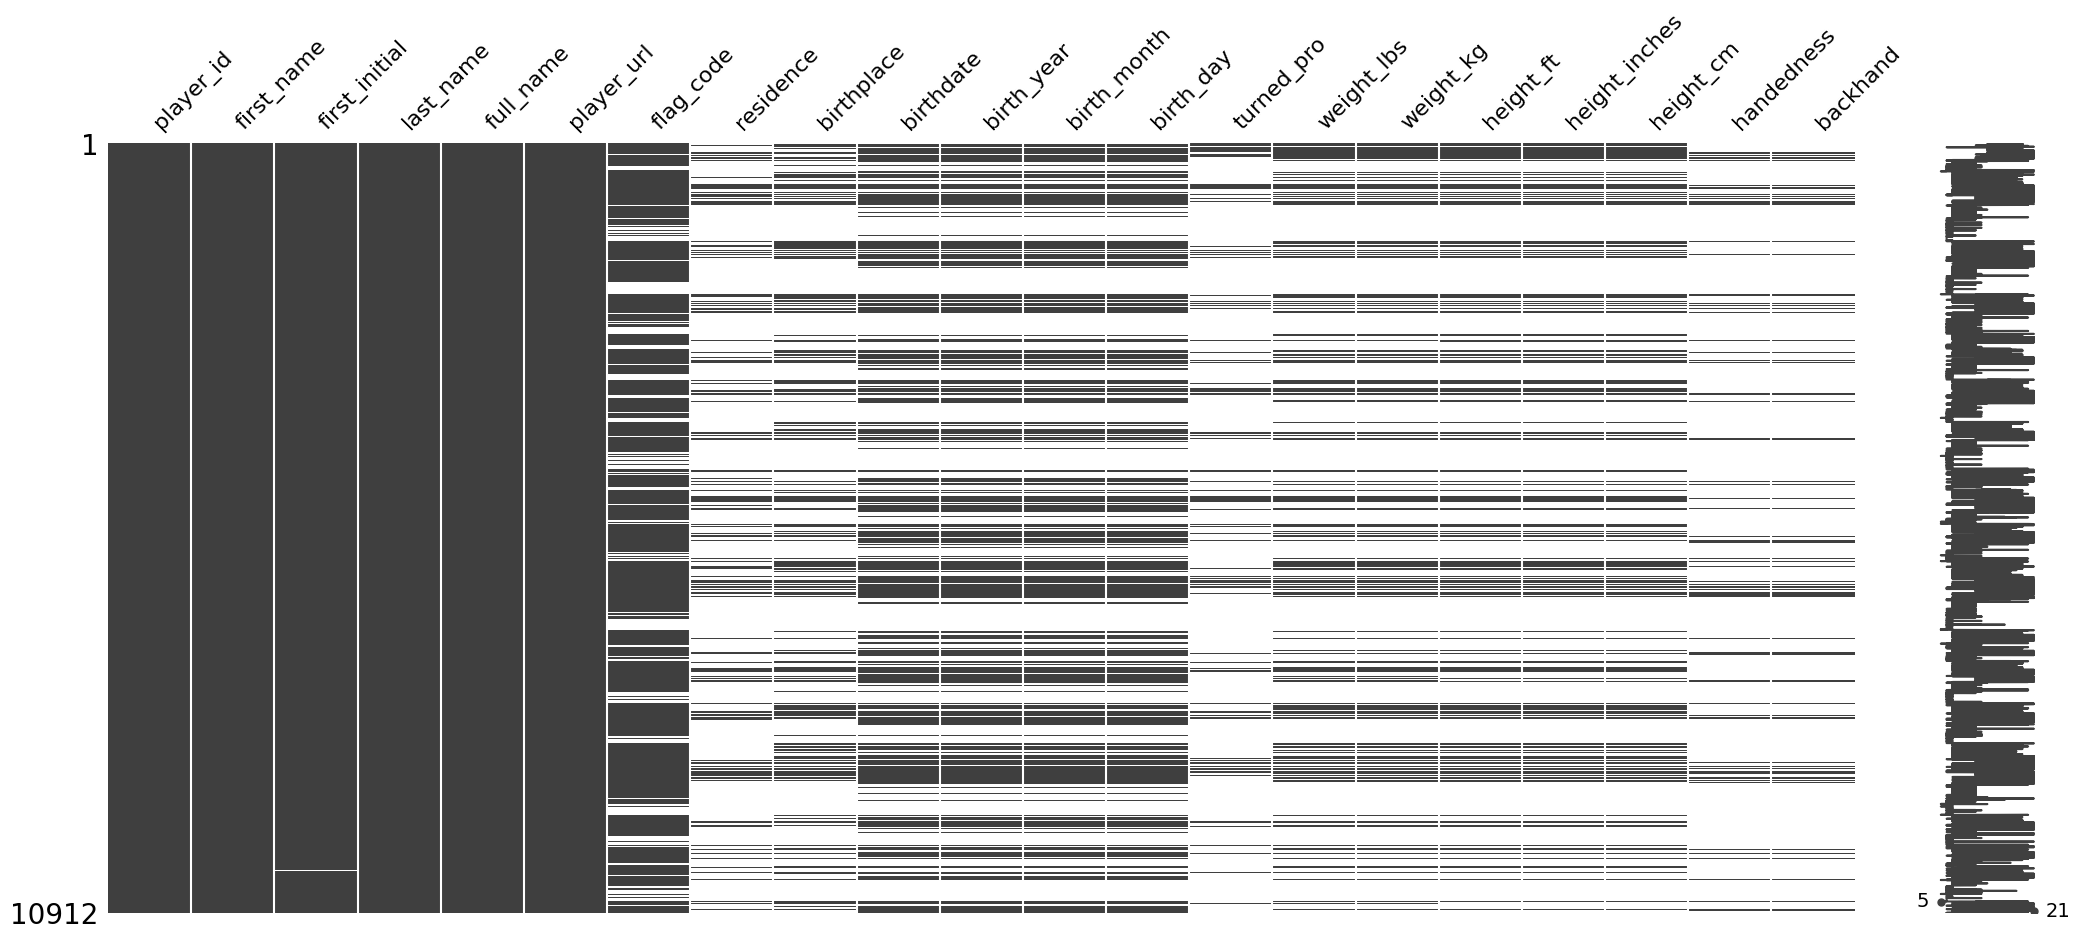

In [29]:
df1 = df1.dropna(axis=1, how='all')
msno.matrix(df1)
plt.show()


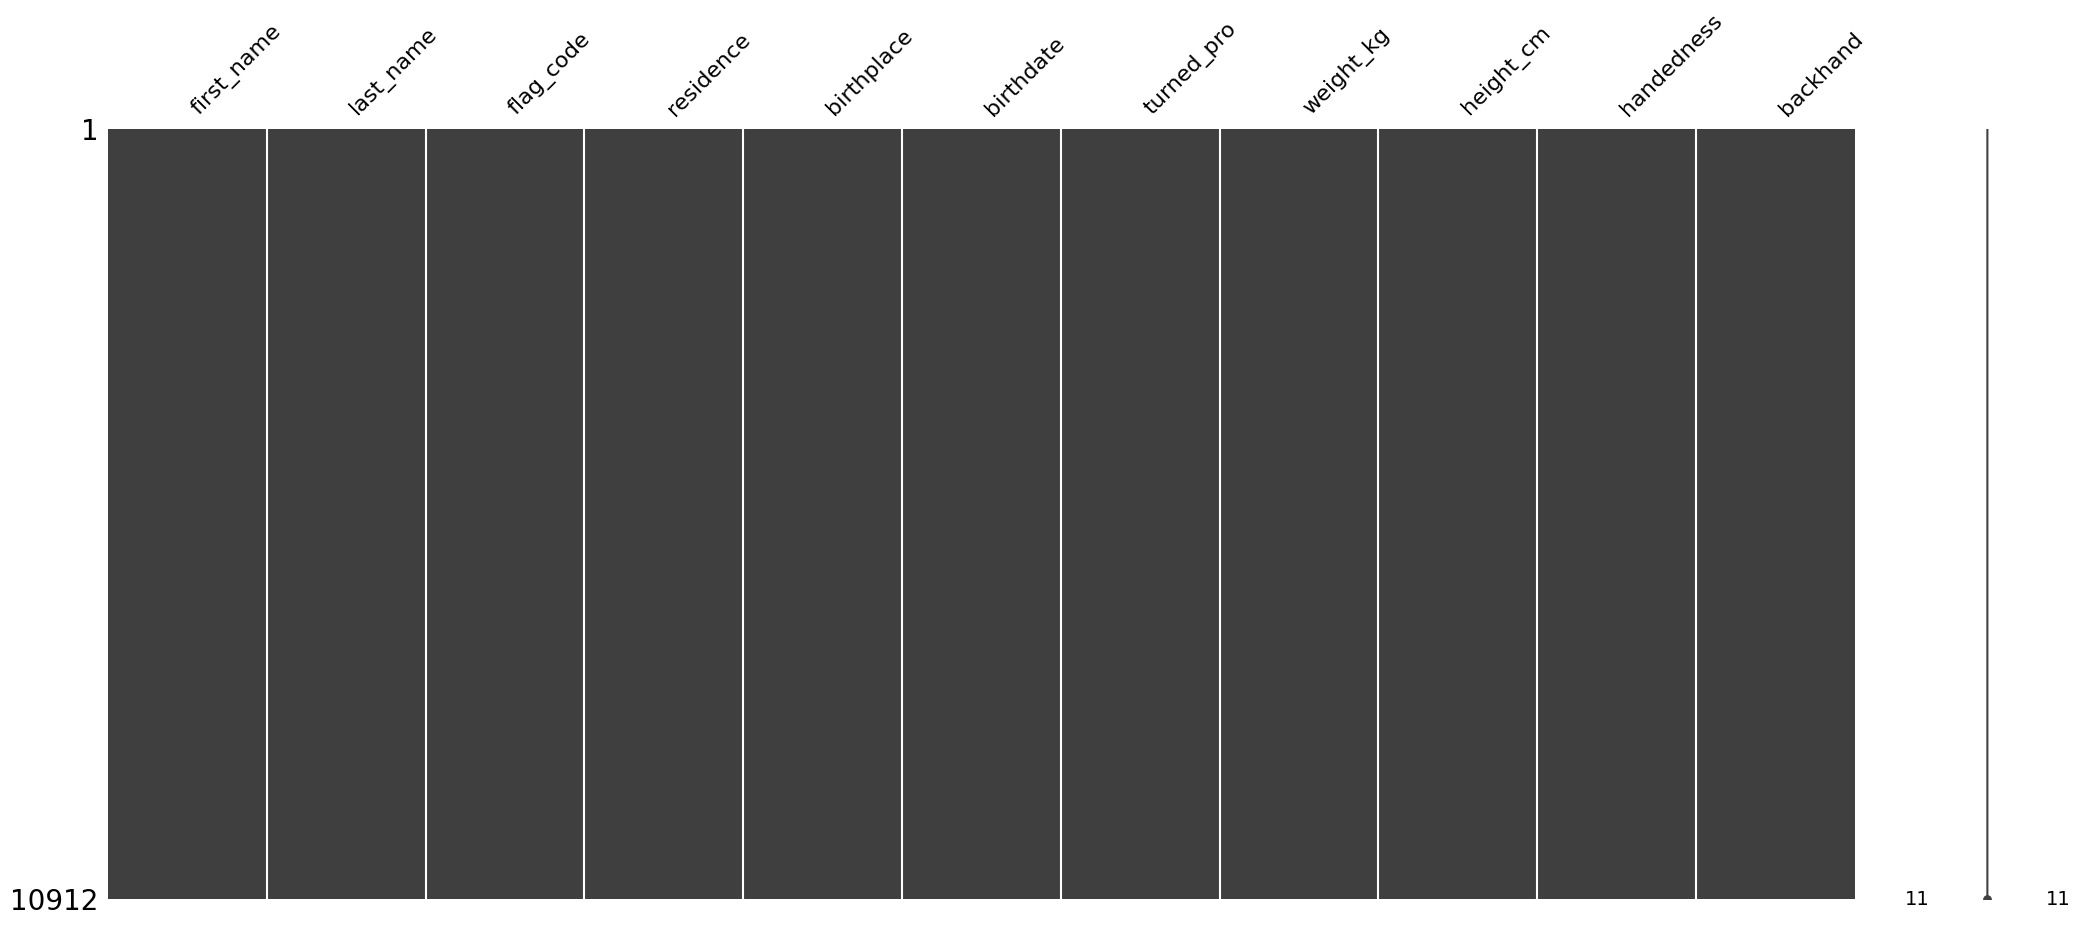

In [30]:
colonnes_a_supprimer = ['first_initial', 'player_id', 'full_name', 'player_url', 'birth_year', 
                        'birth_month', 'birth_day', 'weight_lbs', 'height_ft', 
                        'height_inches']
df1 = df1.drop(columns=colonnes_a_supprimer)
df1 = df1.fillna(0)
msno.matrix(df1)
plt.show()

In [31]:
df1['birthdate'] = df1['birthdate'].astype(str)
df1['birthdate'] = df1['birthdate'].str.split('.').str[0]
df1['birthdate'] = df1['birthdate'].str[:4] + '-' + df1['birthdate'].str[4:6] + '-' + df1['birthdate'].str[6:]
df1['birthdate'] = pd.to_datetime(df1['birthdate'], errors='coerce')

In [32]:
df1['birthdate'] = df1['birthdate'].astype(str)
df1['birthdate'] = df1['birthdate'].str.replace(r'(\d{4})(\d{2})(\d{2})', r'\1-\2-\3')
df1['birthdate'] = pd.to_datetime(df1['birthdate'], errors='coerce', format='%Y-%m-%d')
current_year = datetime.now().year
df1['age'] = current_year - df1['birthdate'].dt.year

In [34]:
df1.to_csv('atp_players_Nettoye.csv')

-------------------------------------------------------- Fin atp players --------------------------------------------------------------------------------------------

1.2. Atp_2000 à Atp_2012

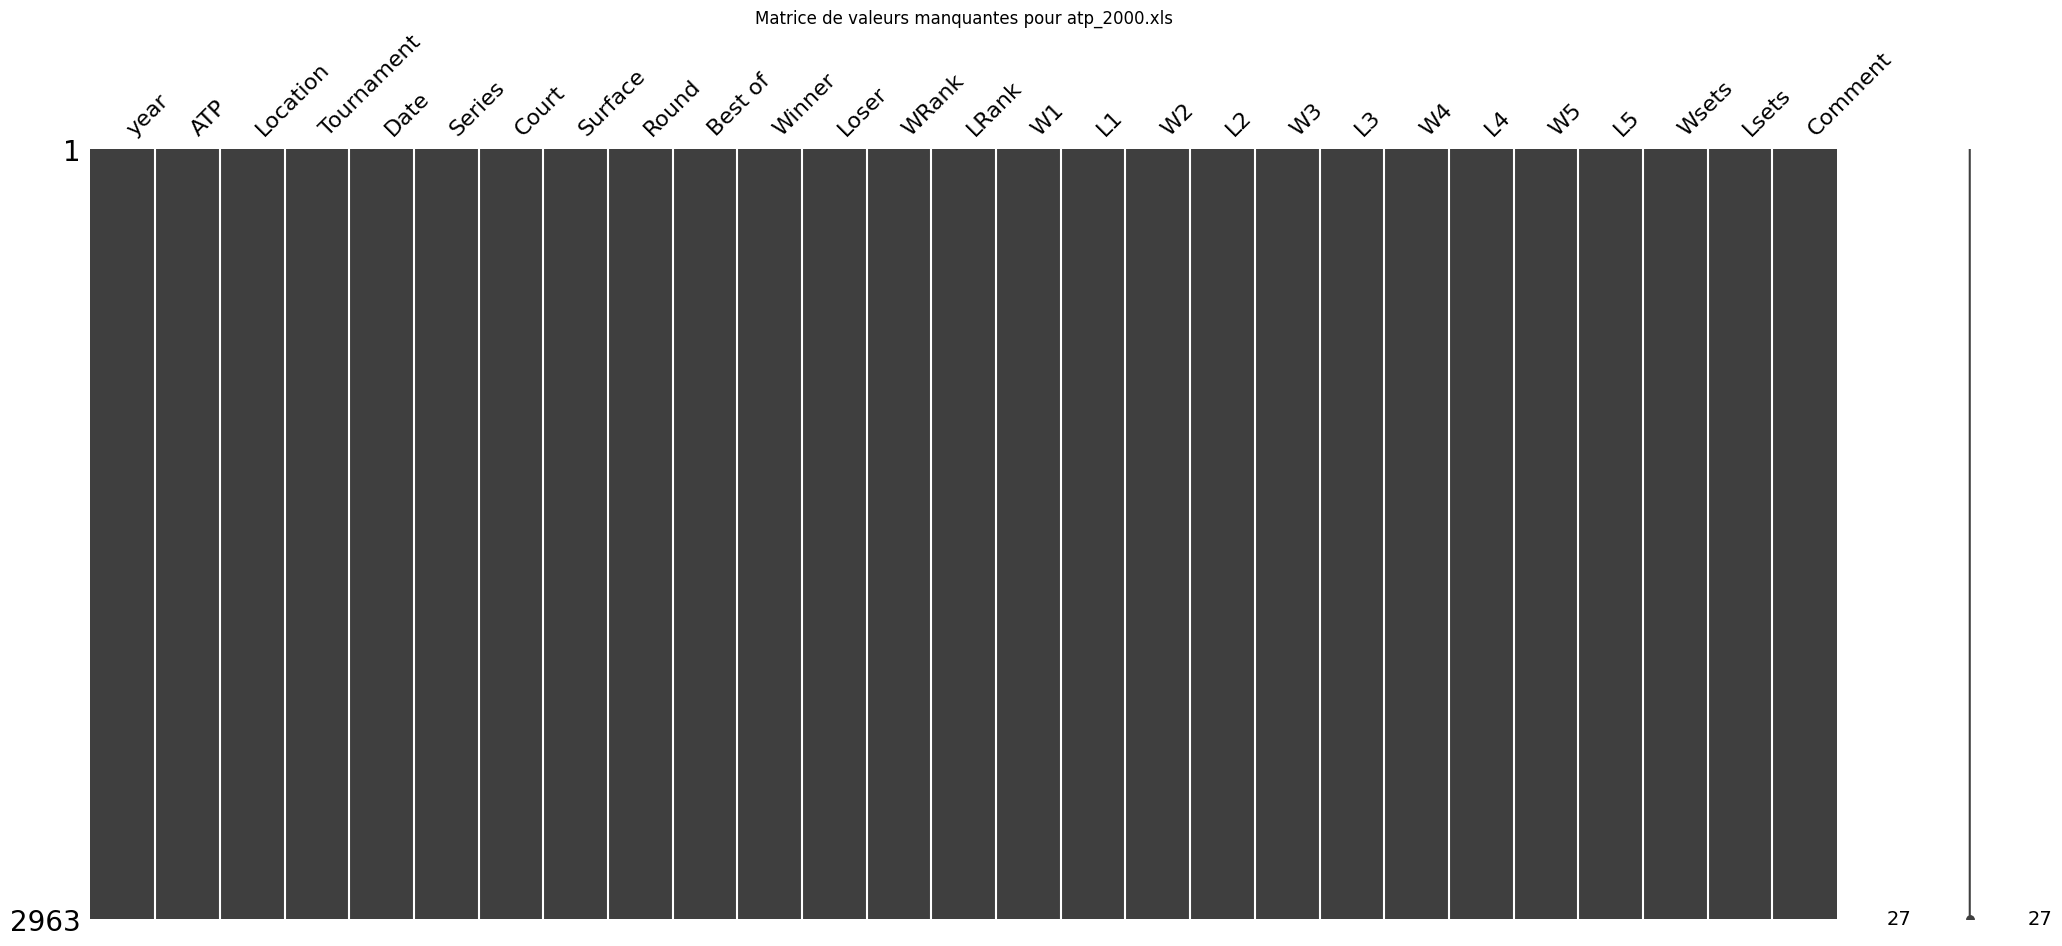

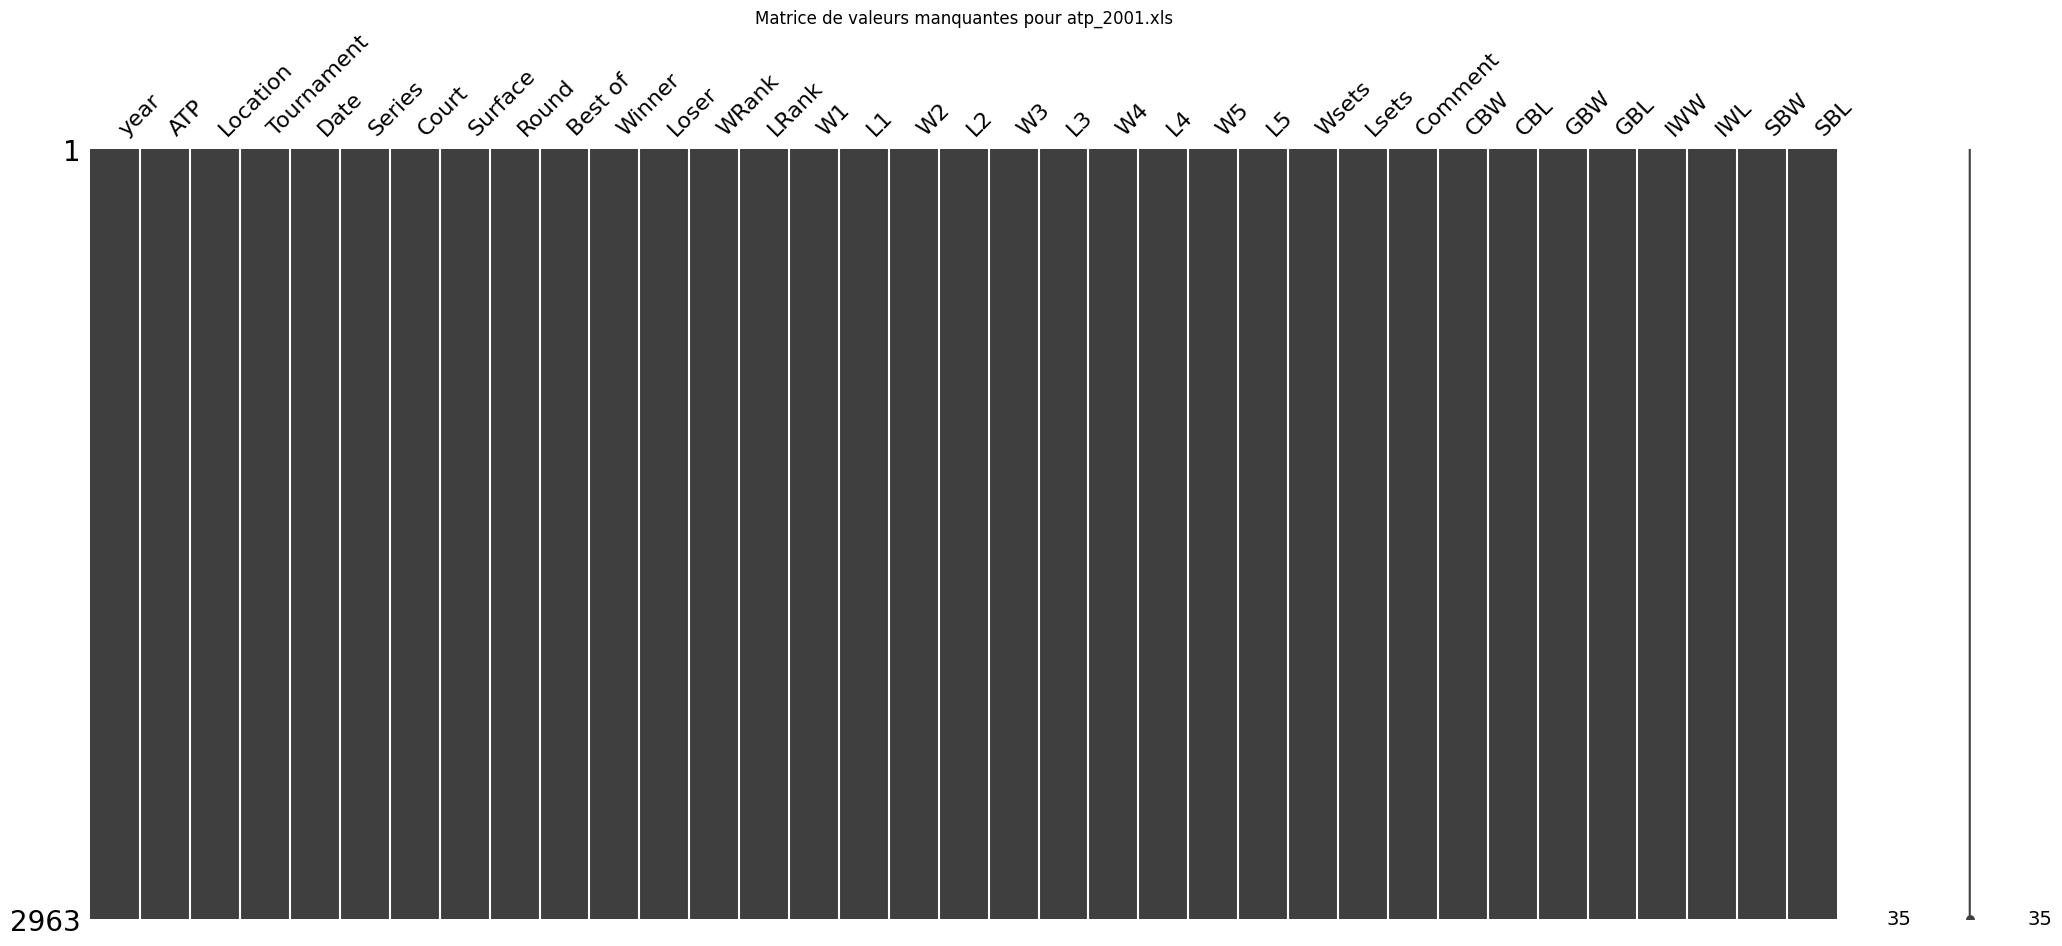

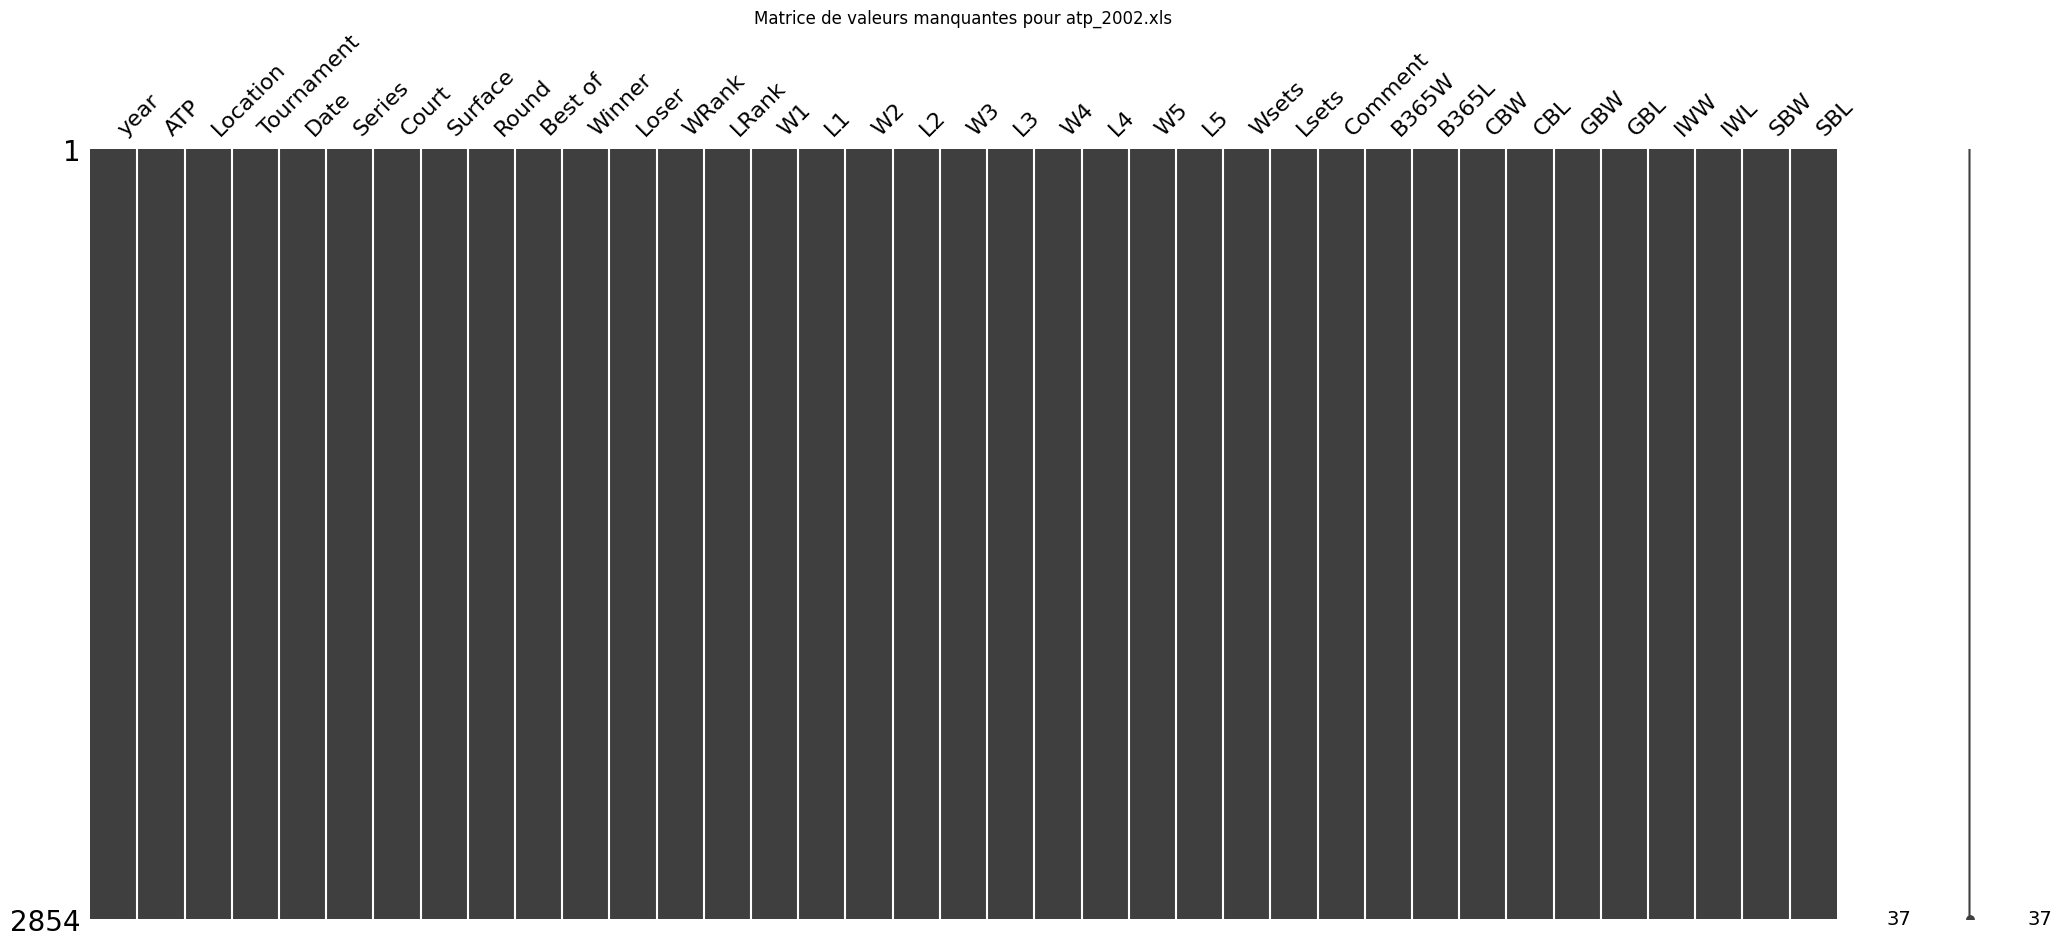

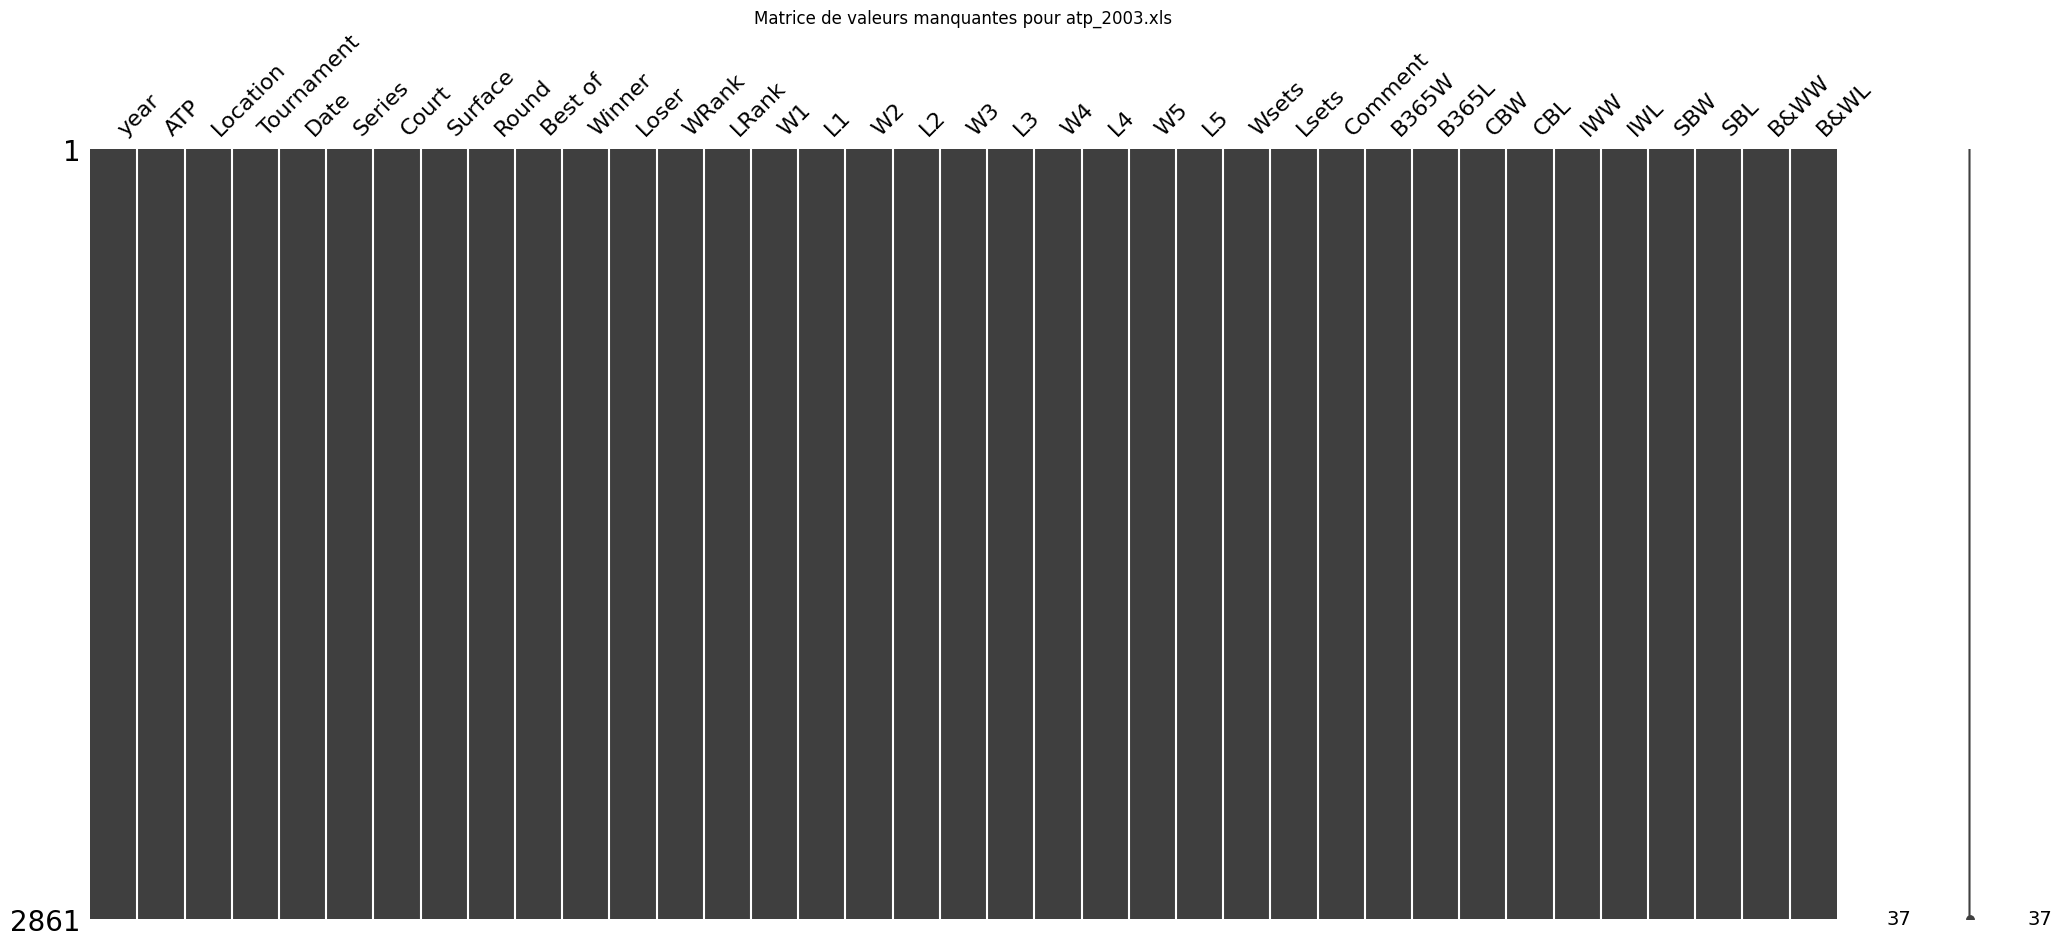

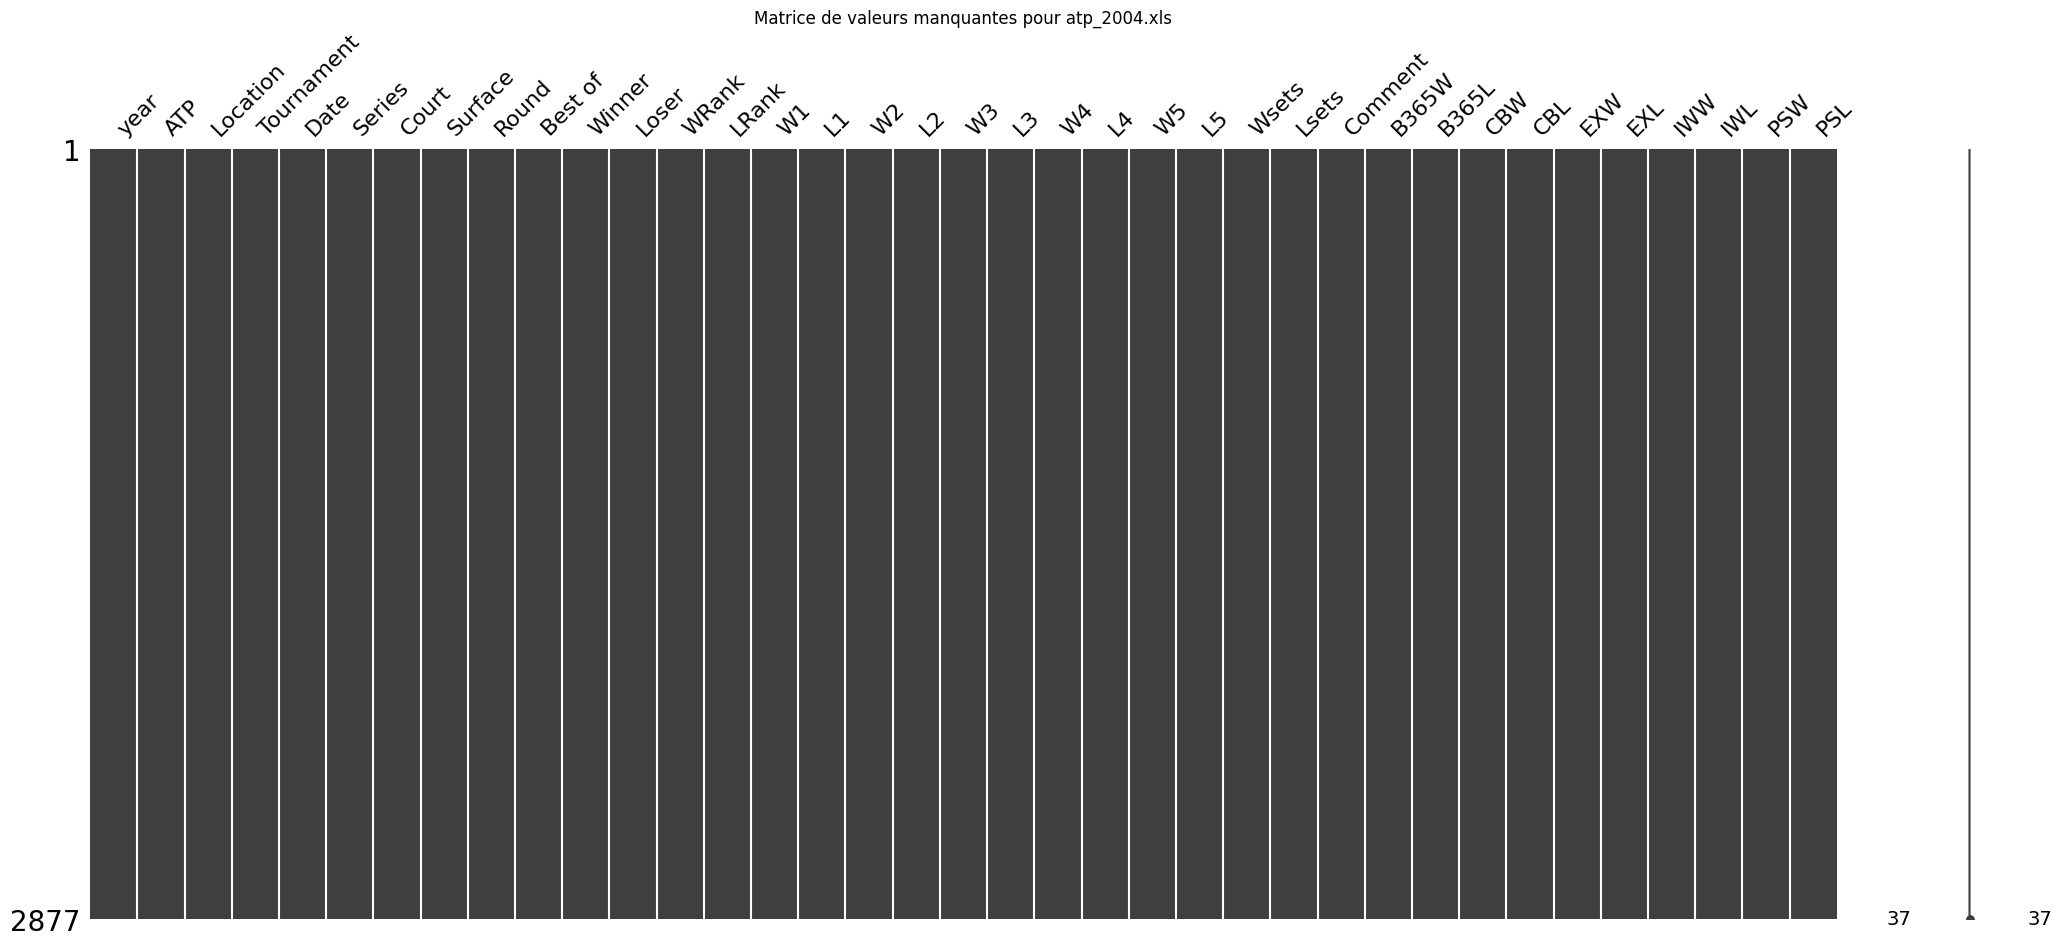

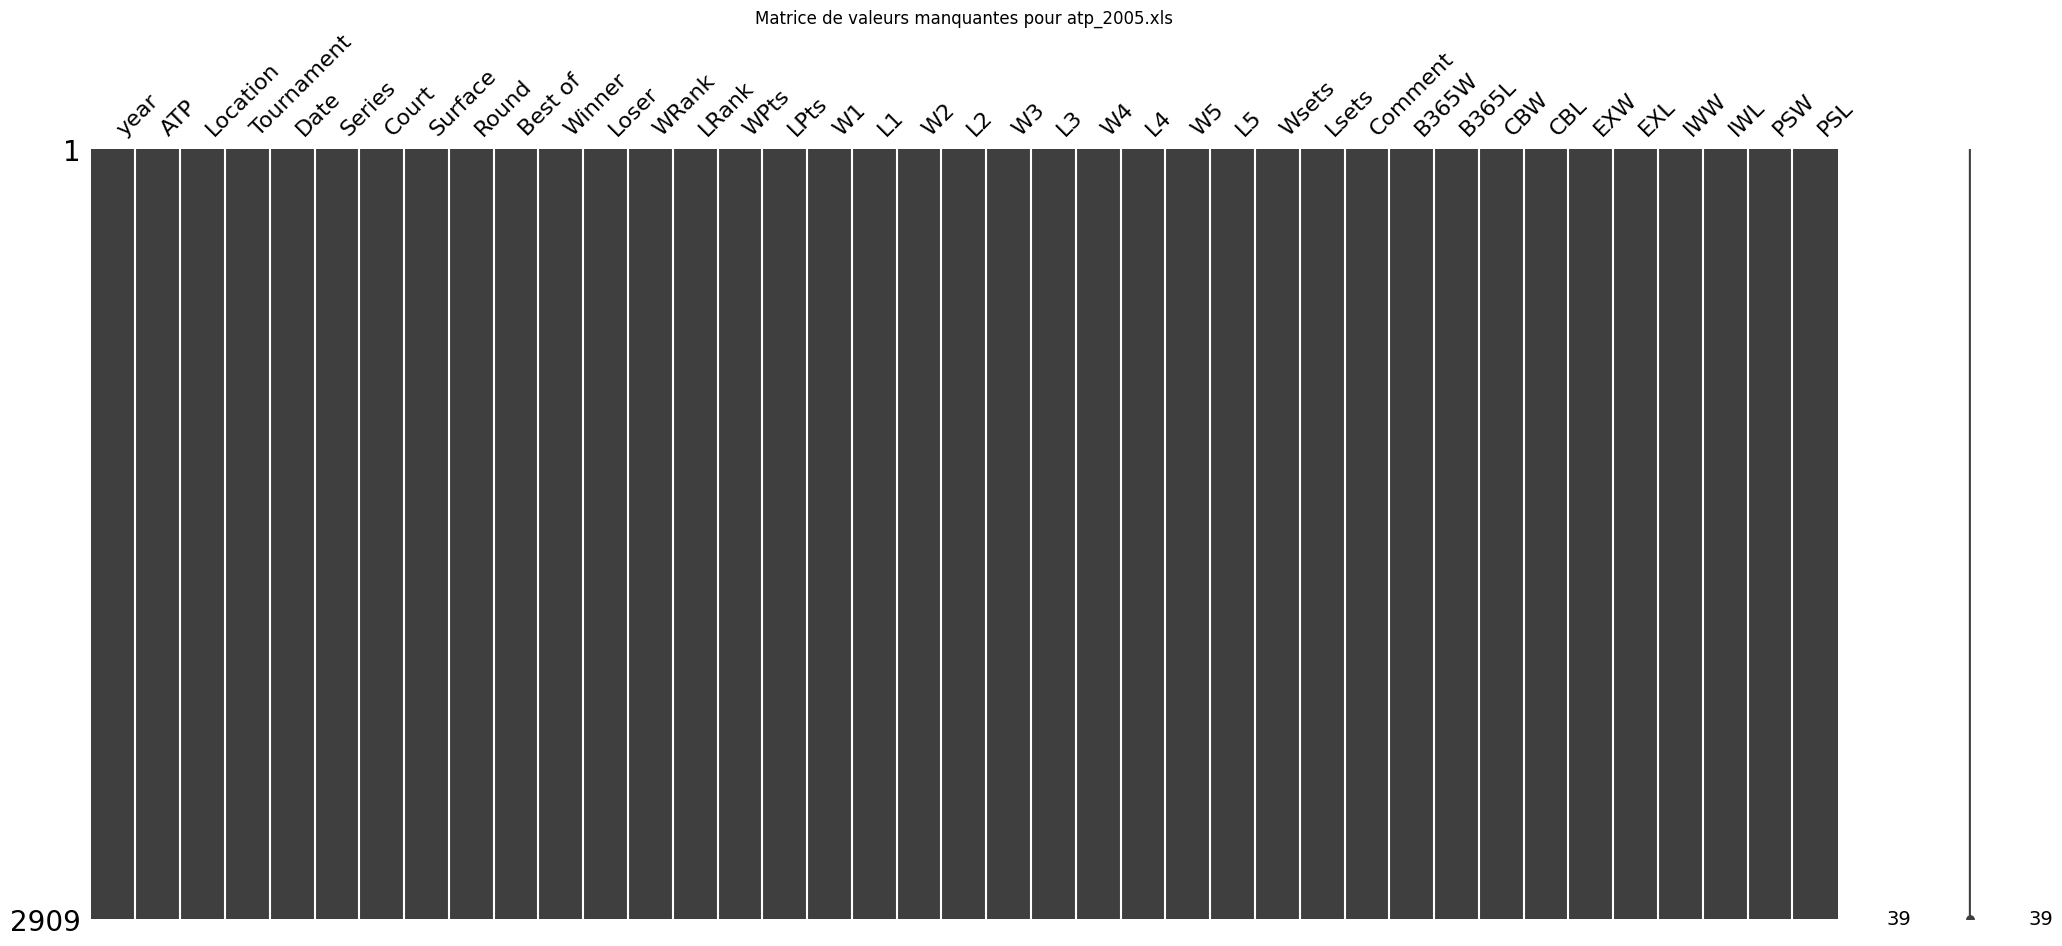

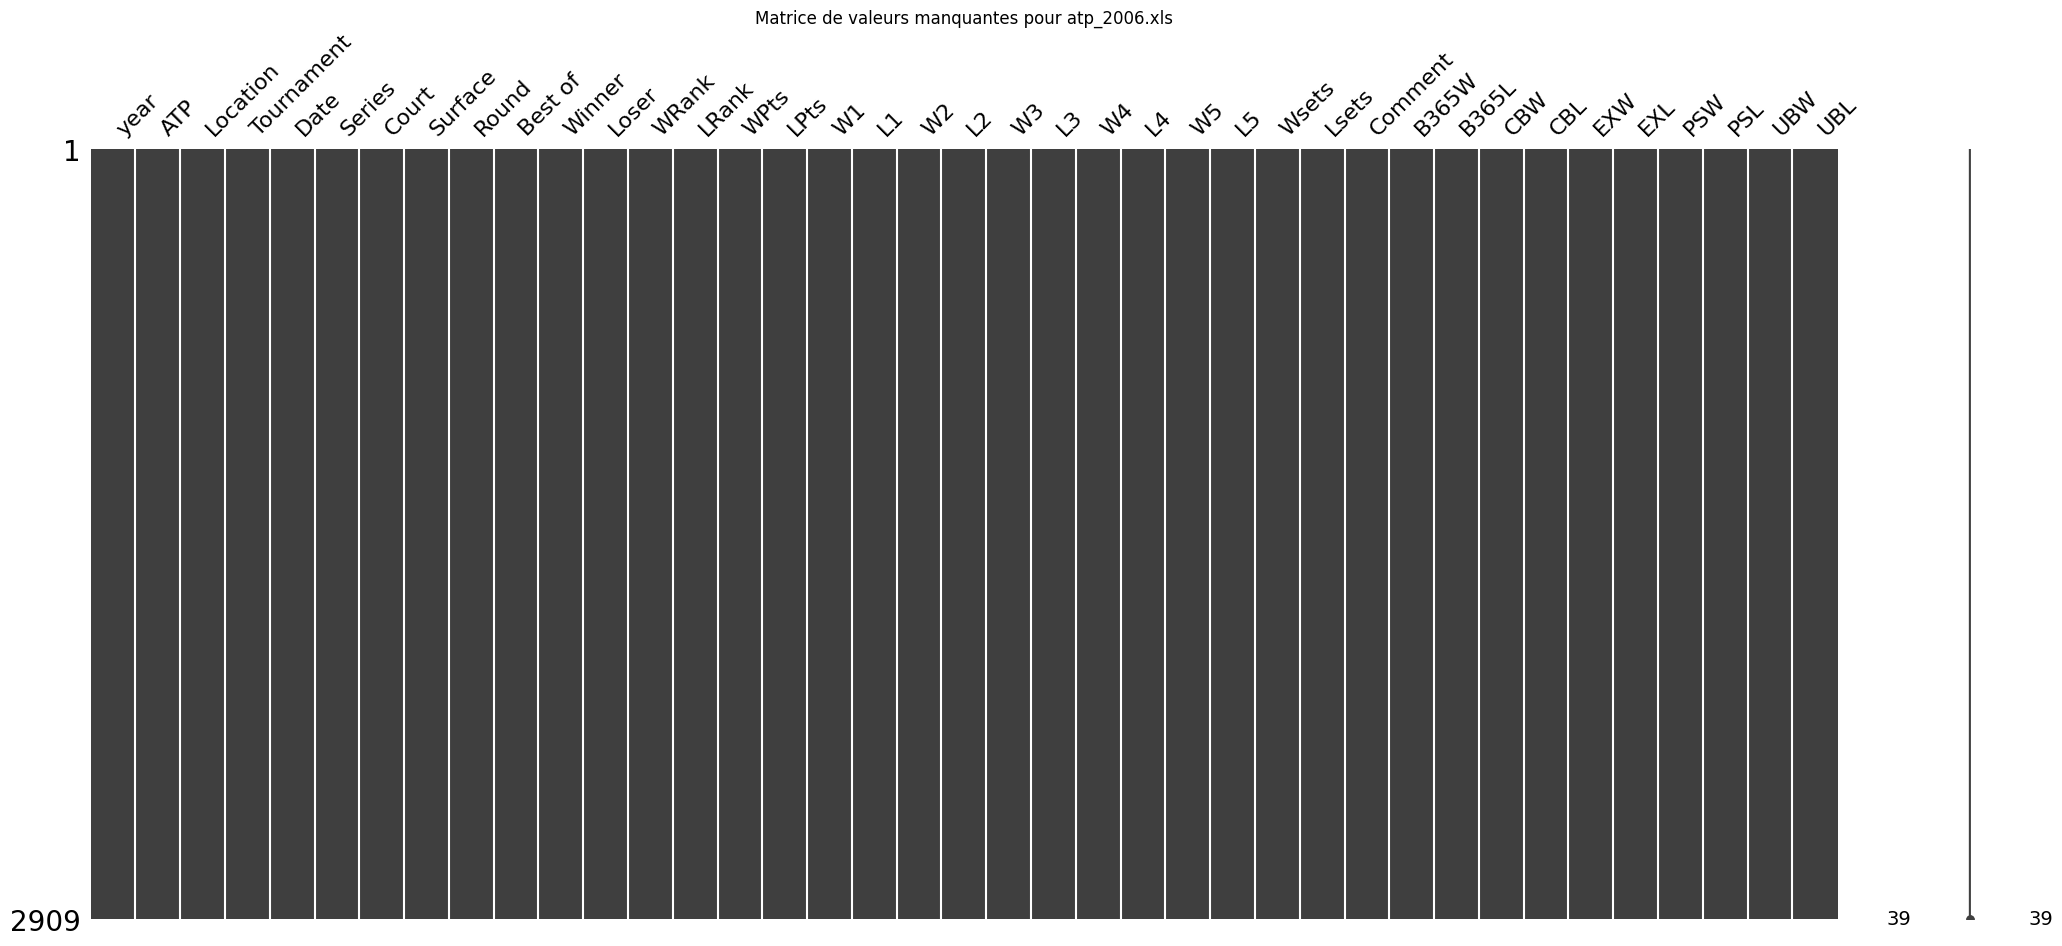

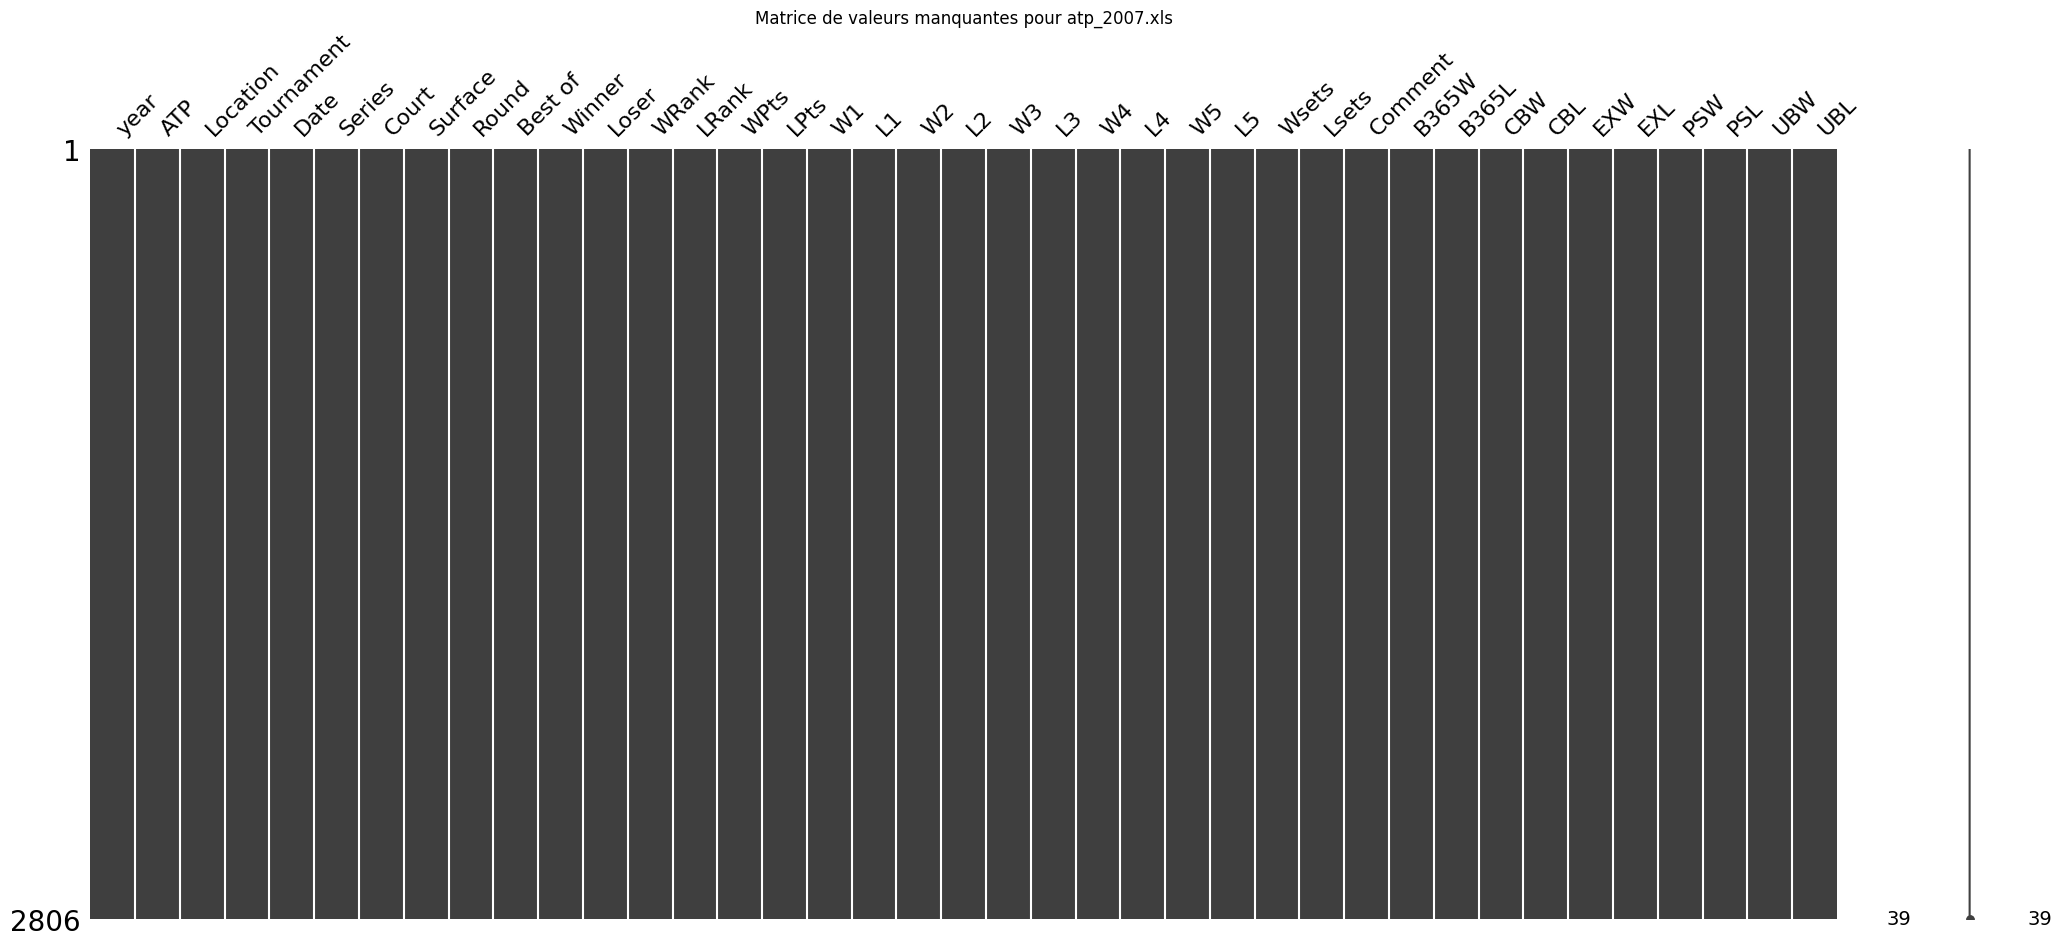

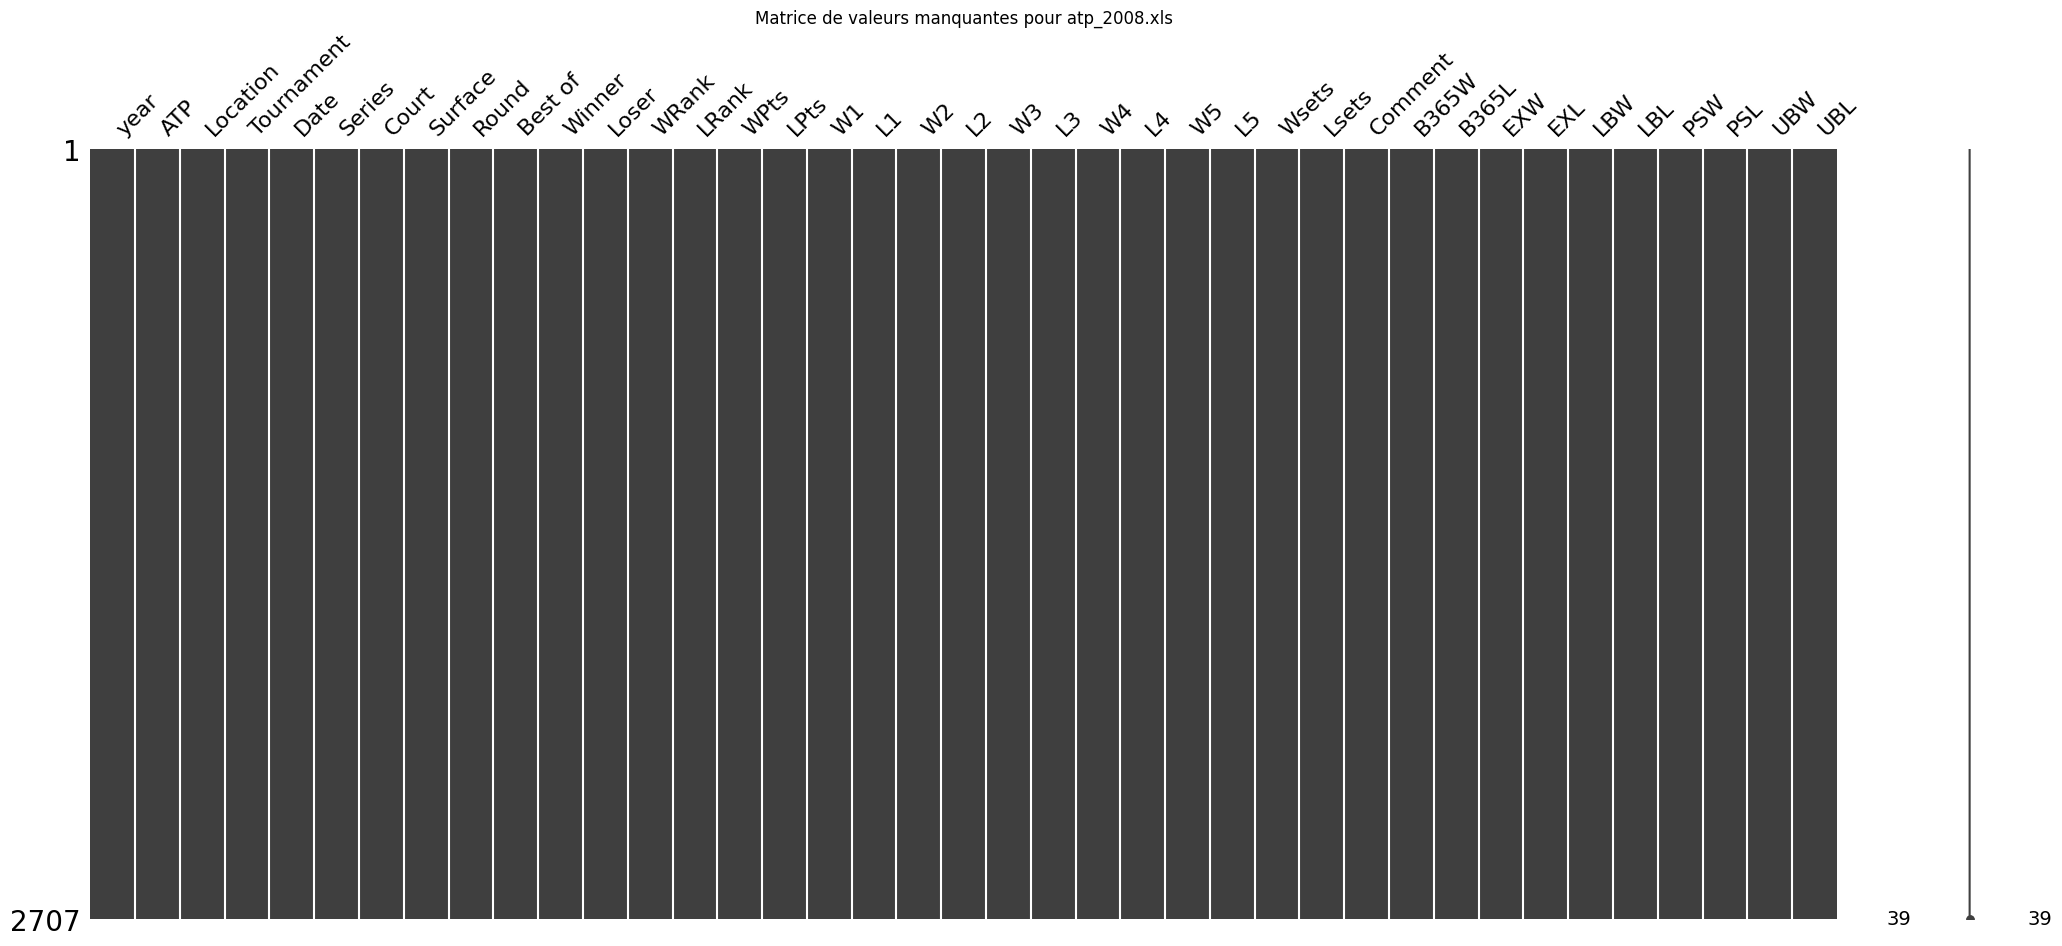

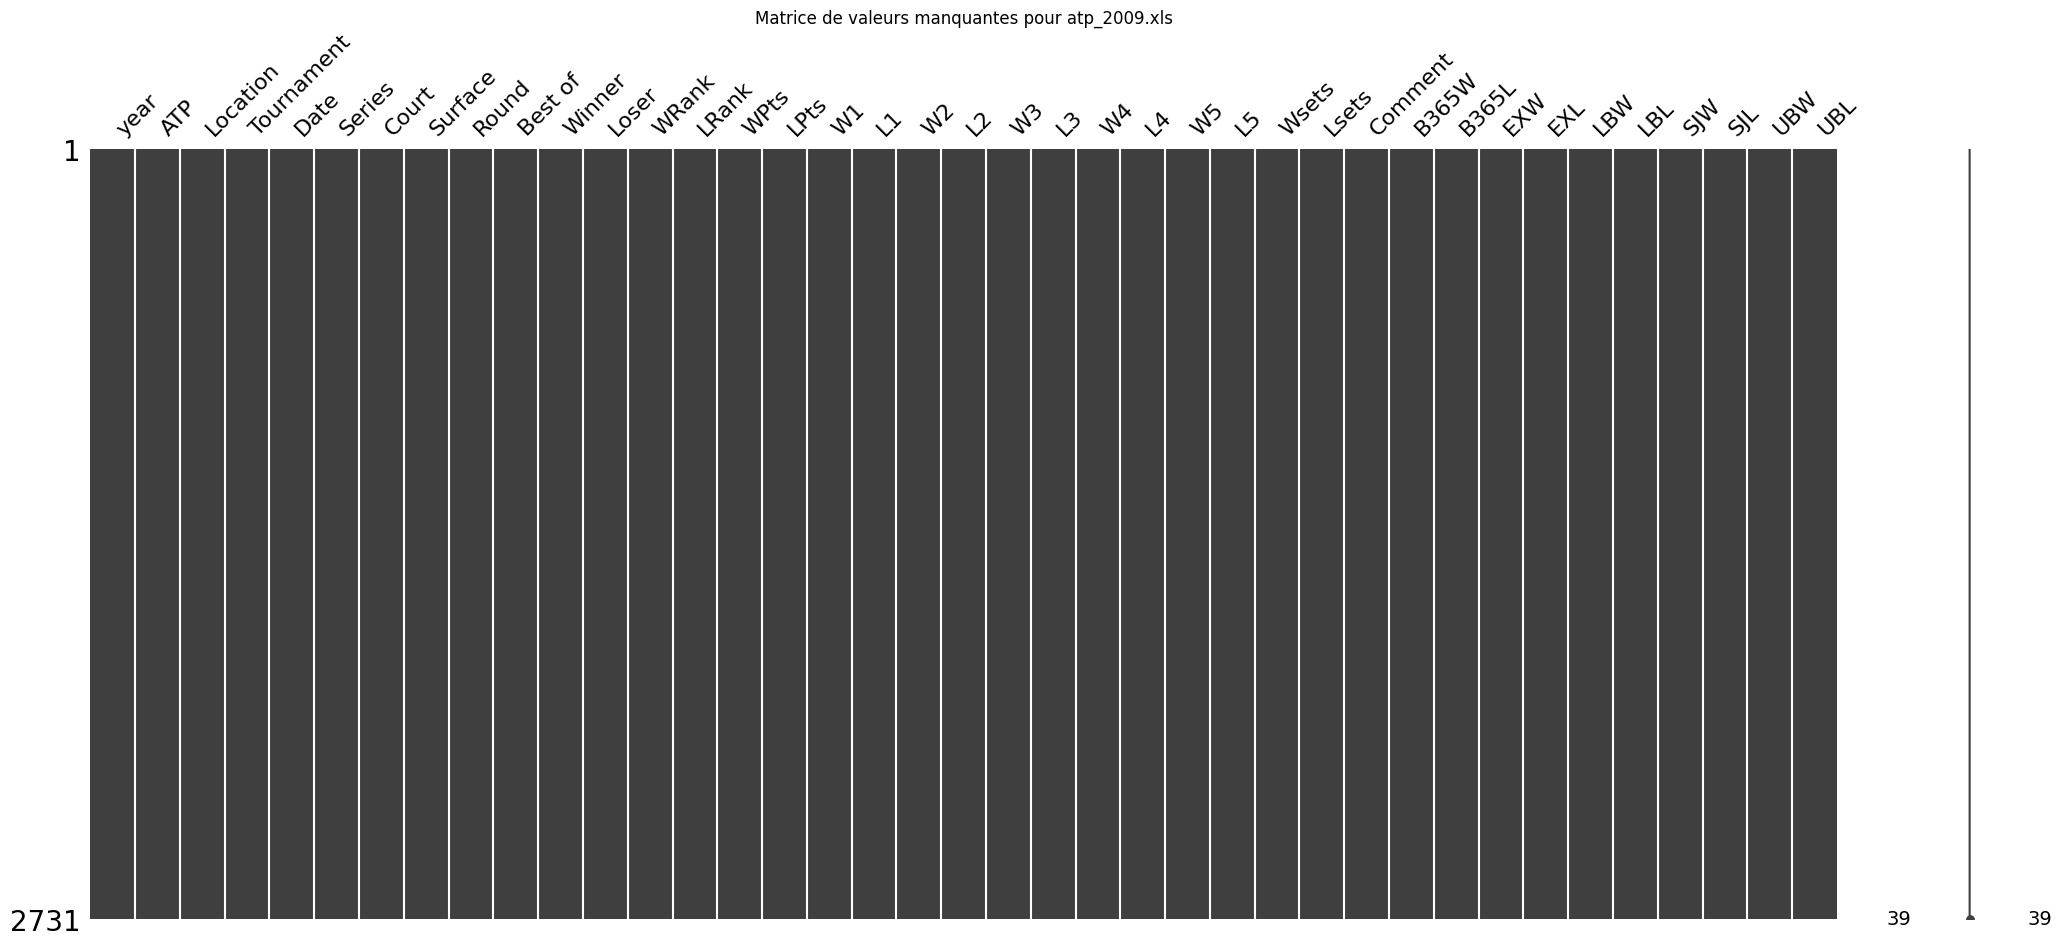

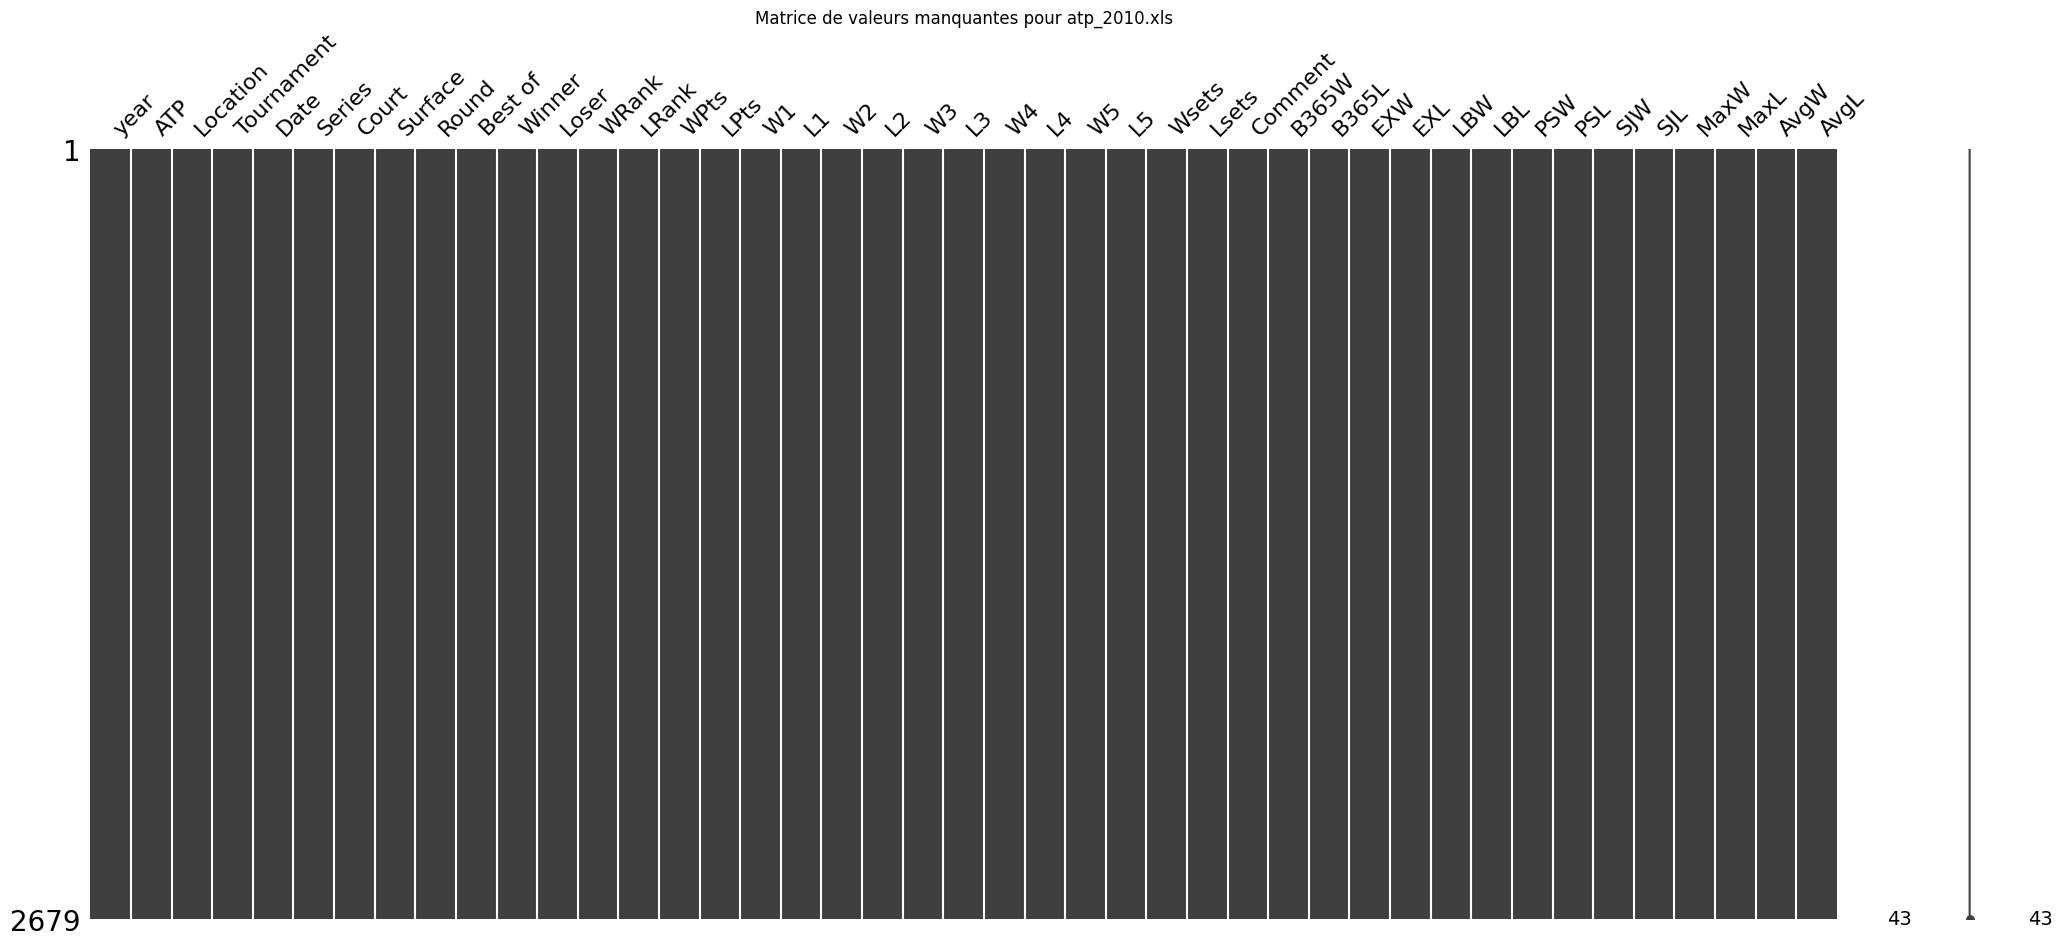

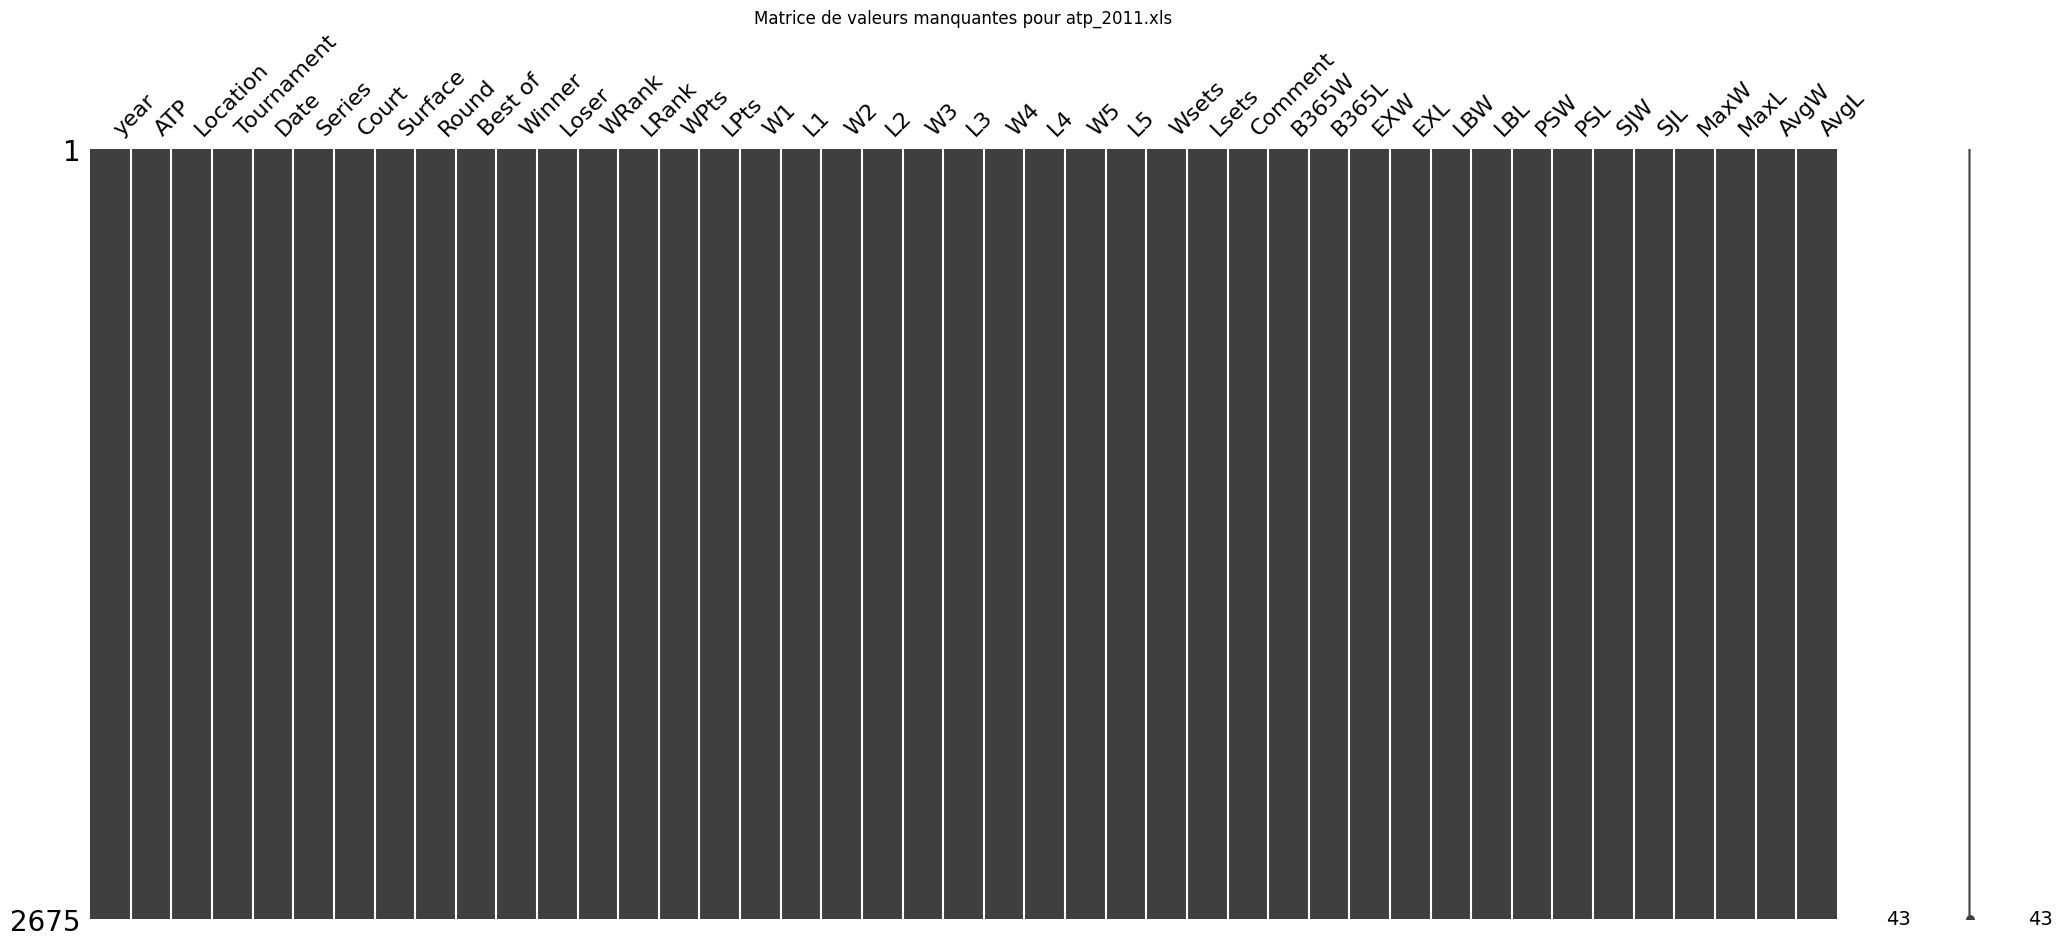

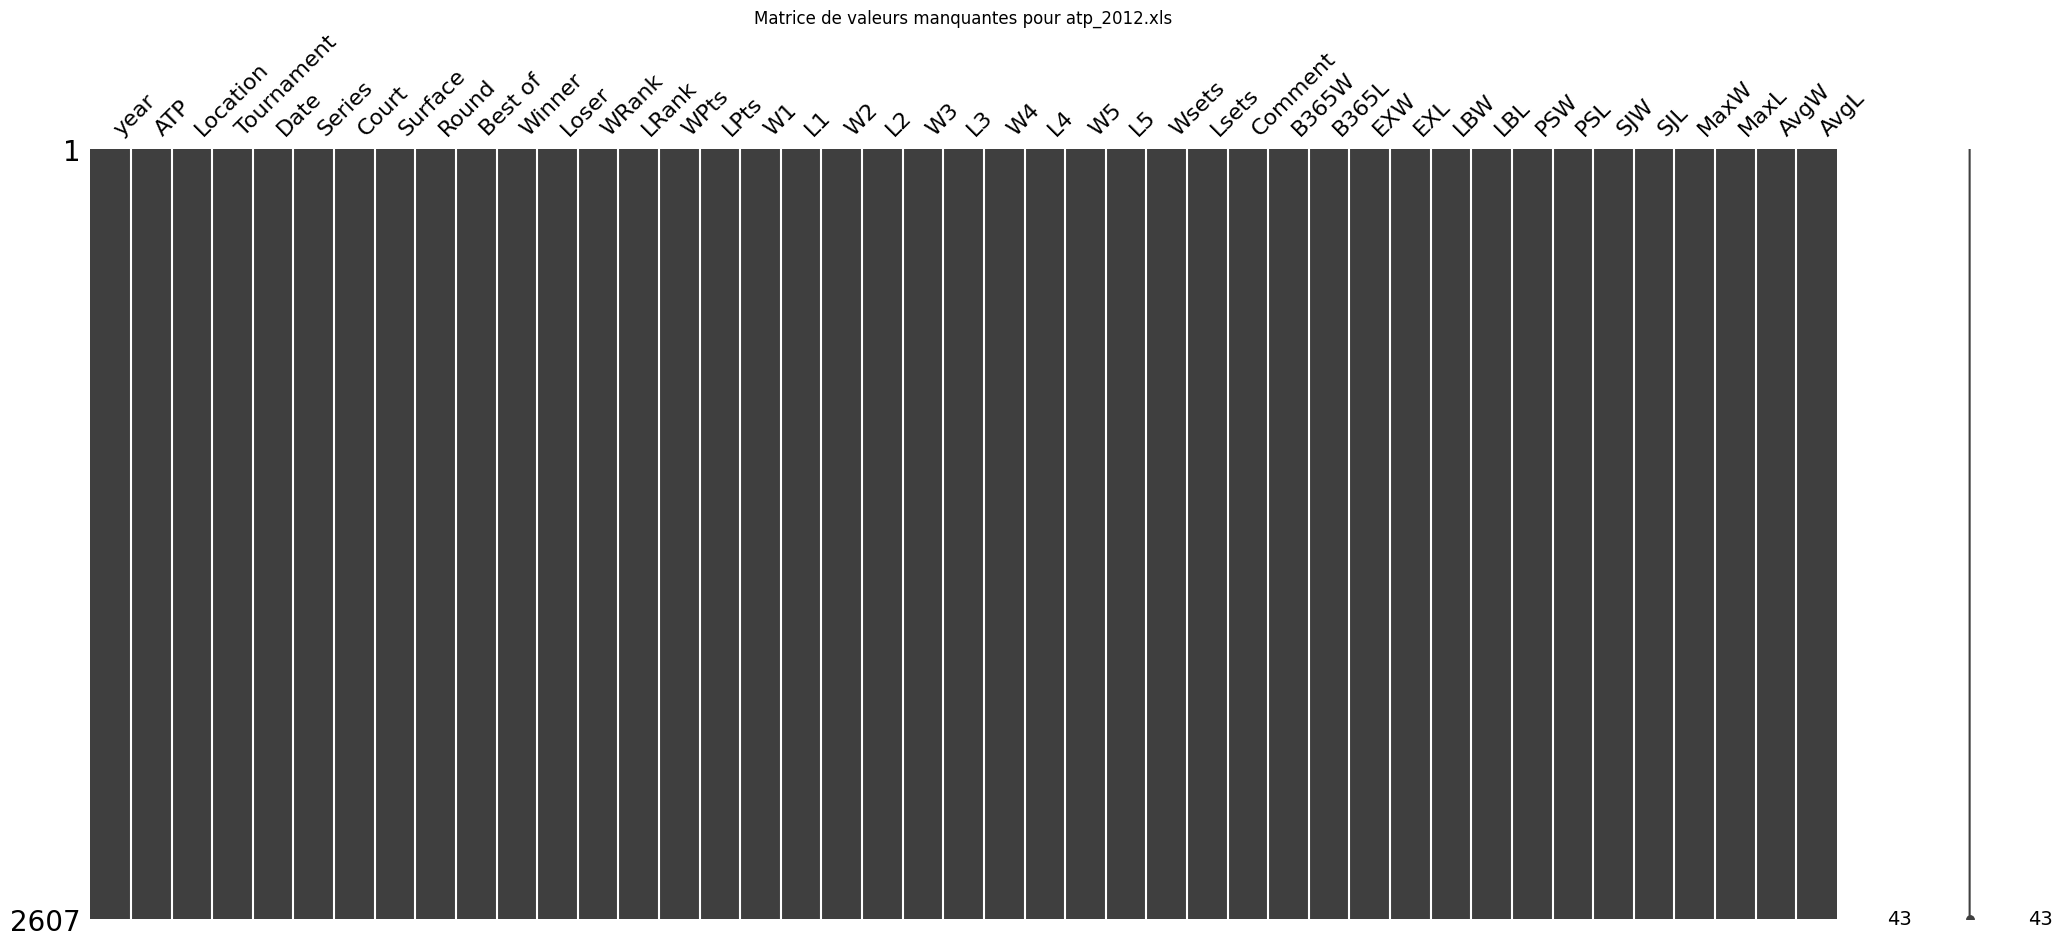

In [30]:
datasets = ['atp_2000.xls', 'atp_2001.xls', 'atp_2002.xls', 'atp_2003.xls', 'atp_2004.xls',
            'atp_2005.xls', 'atp_2006.xls', 'atp_2007.xls', 'atp_2008.xls', 'atp_2009.xls',
            'atp_2010.xls', 'atp_2011.xls', 'atp_2012.xls']

dfs = []
for dataset in datasets:
    df = pd.read_excel(dataset)
    year = int(dataset.split('_')[1].split('.')[0])  
    df['year'] = year
    cols = ['year'] + [col for col in df.columns if col != 'year']
    df = df[cols]
    df = df.dropna(axis=1, how='all')
    df.fillna(0, inplace=True)
    msno.matrix(df)
    plt.title(f"Matrice de valeurs manquantes pour {dataset}")
    plt.show()
    dfs.append(df)


1.3. Atp_2013 à Atp_2024

c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


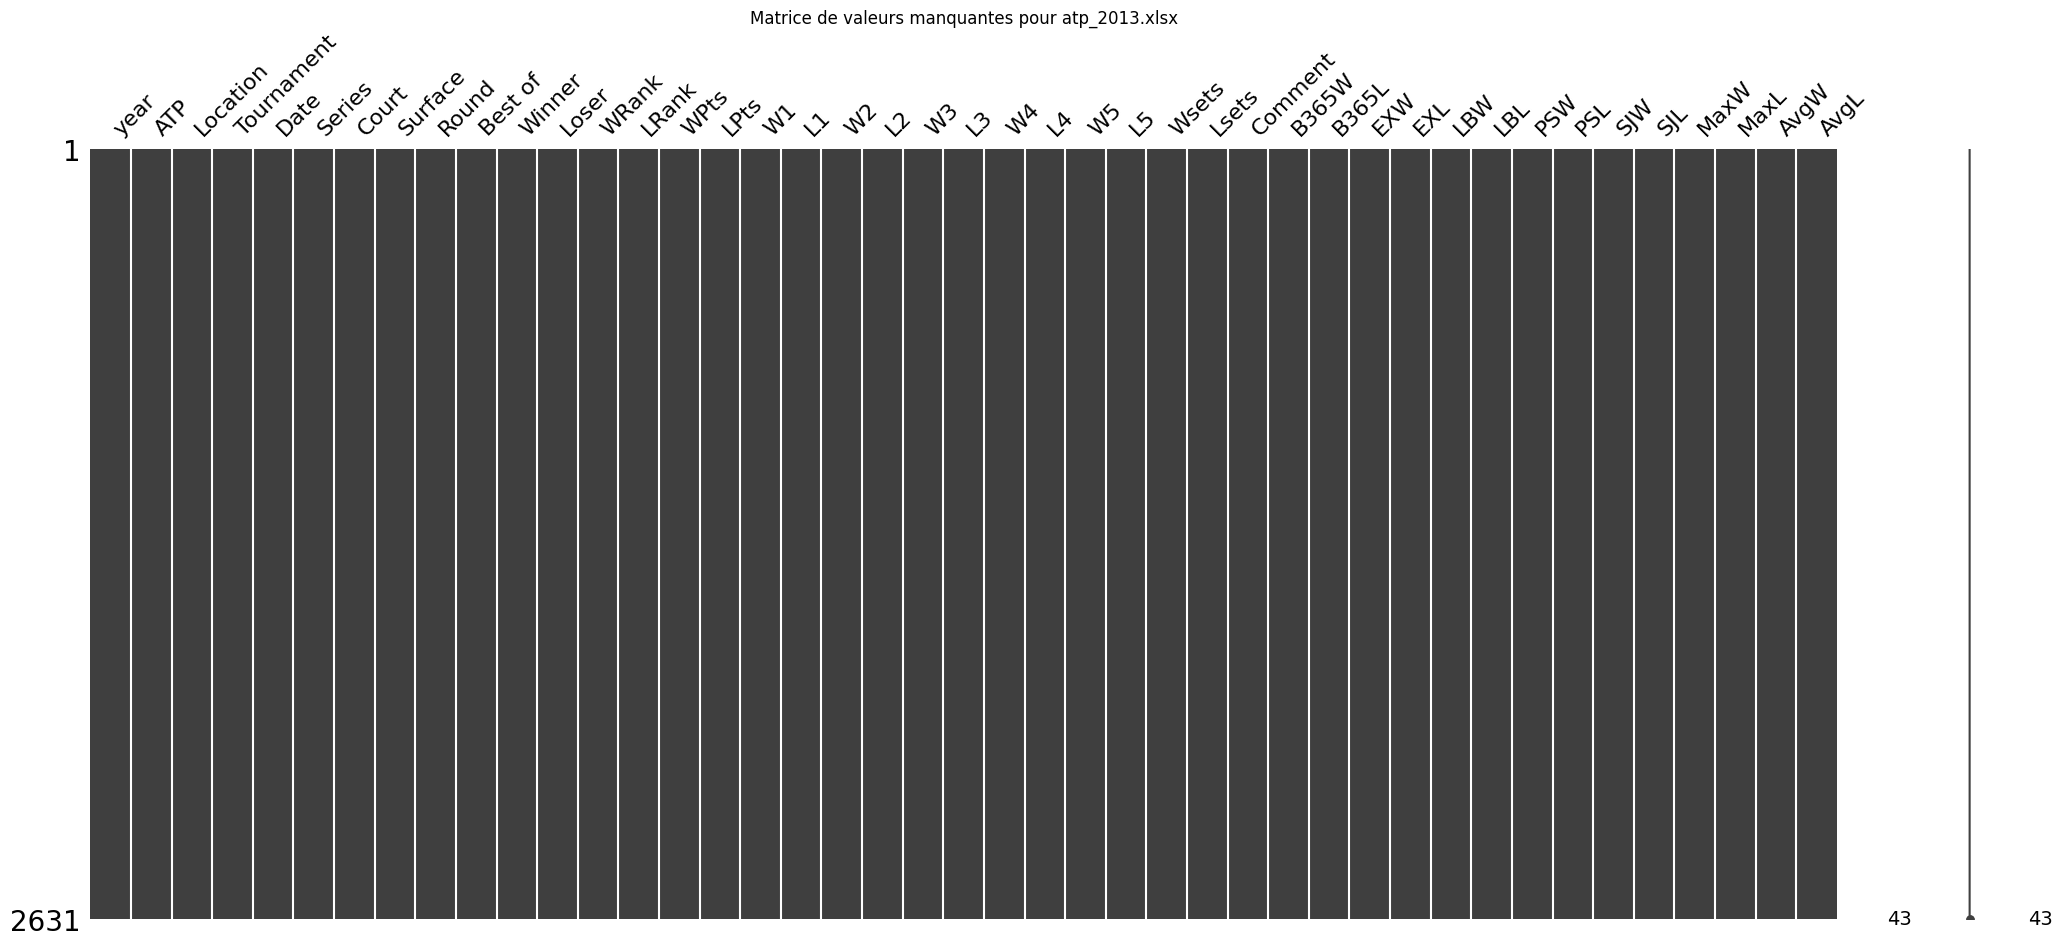

c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


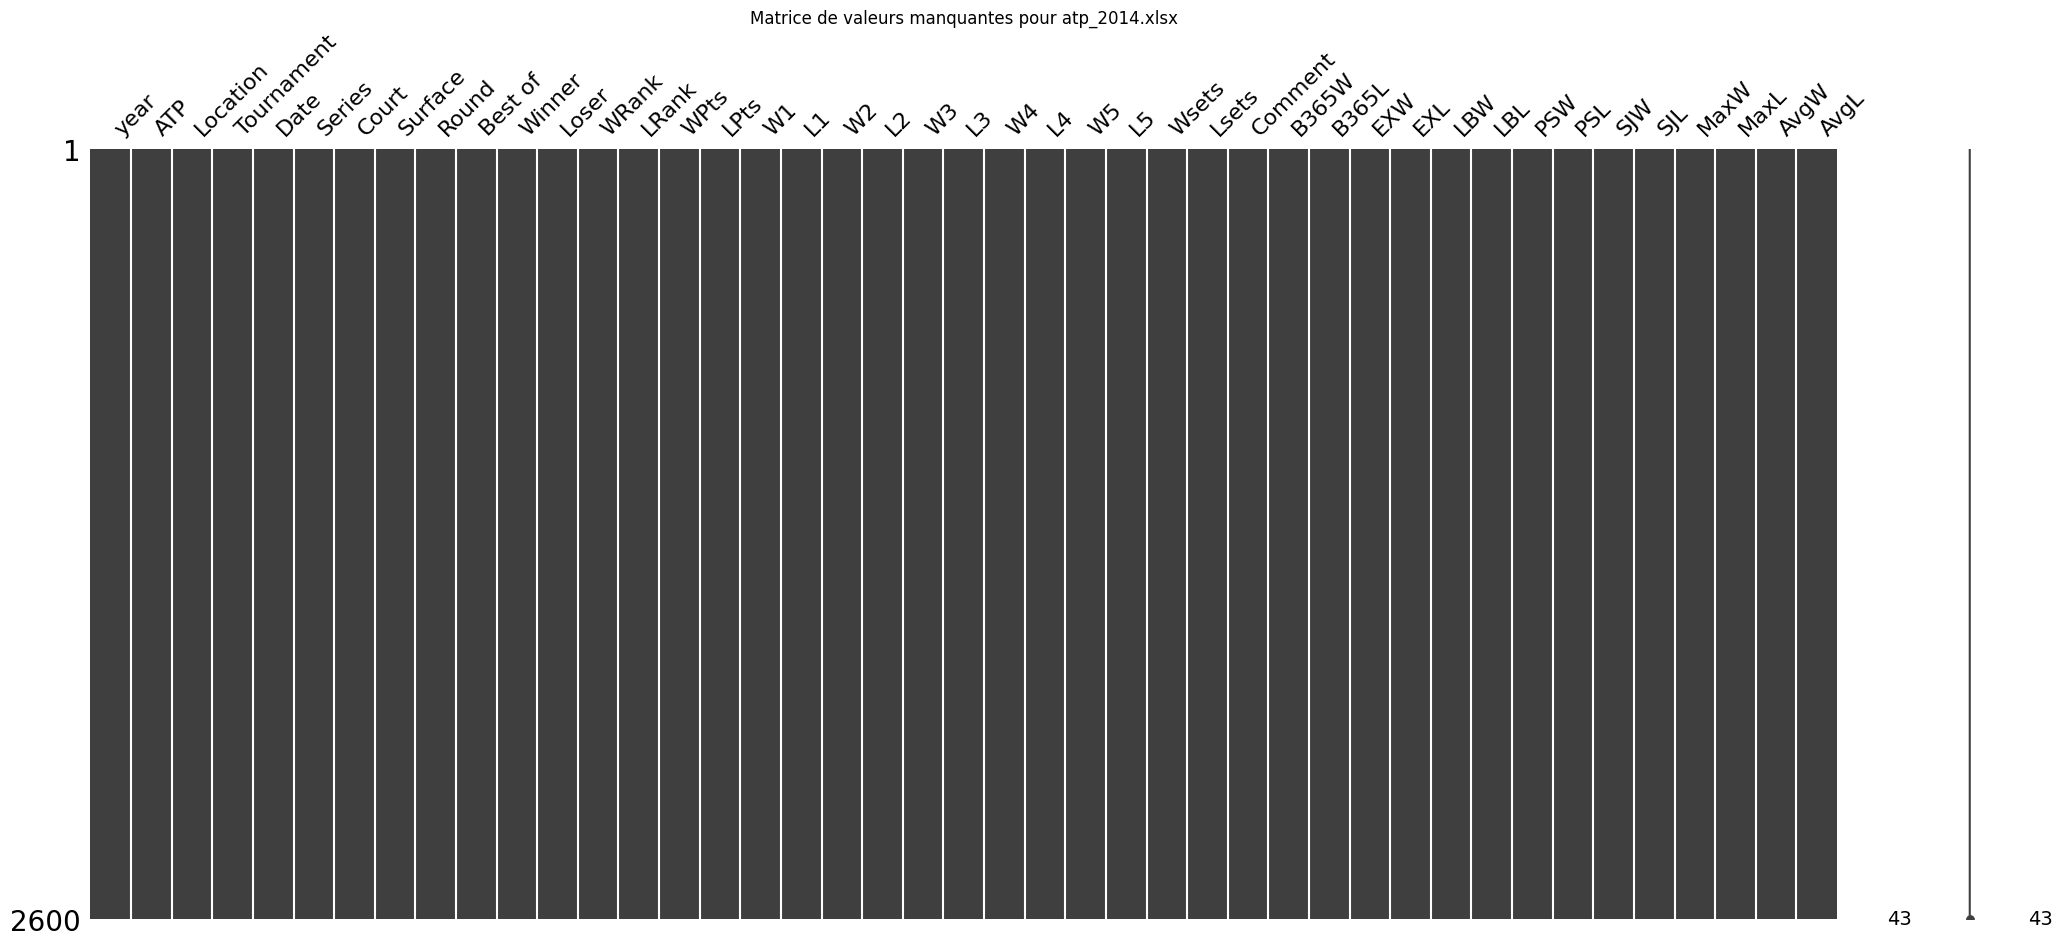

c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


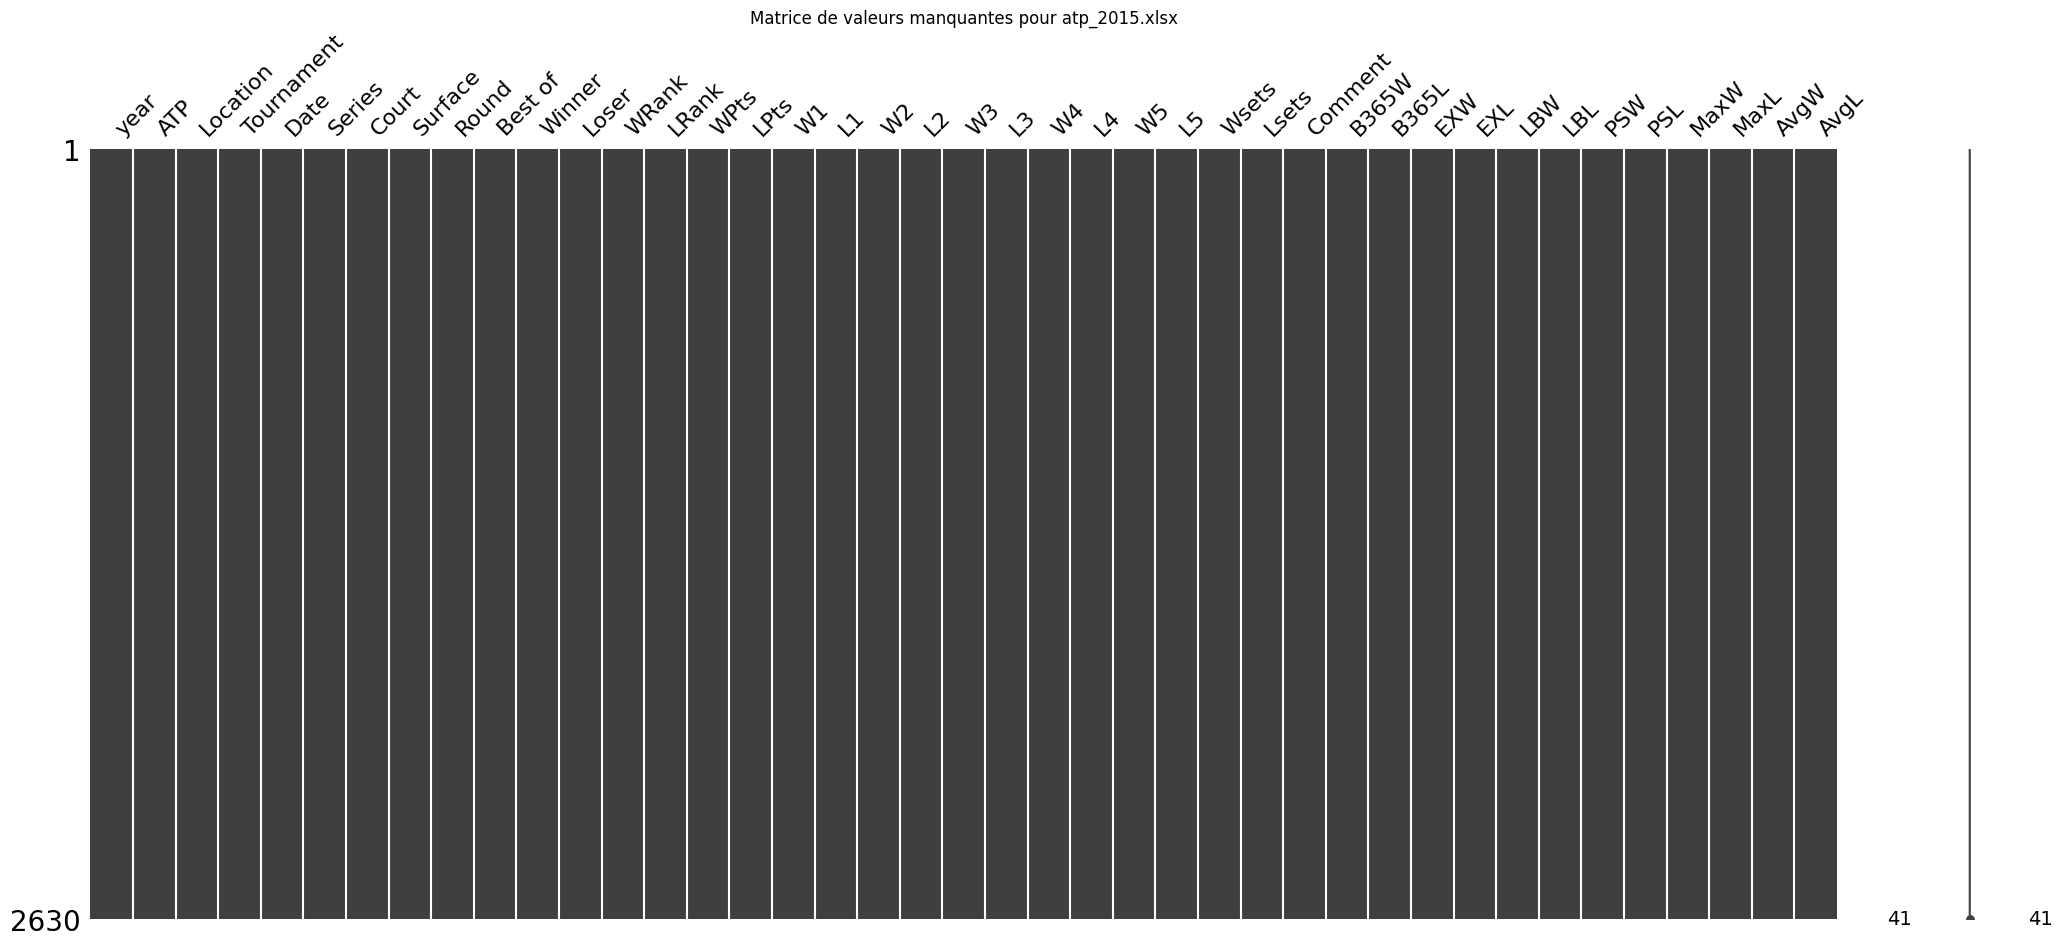

c:\Users\sonia\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


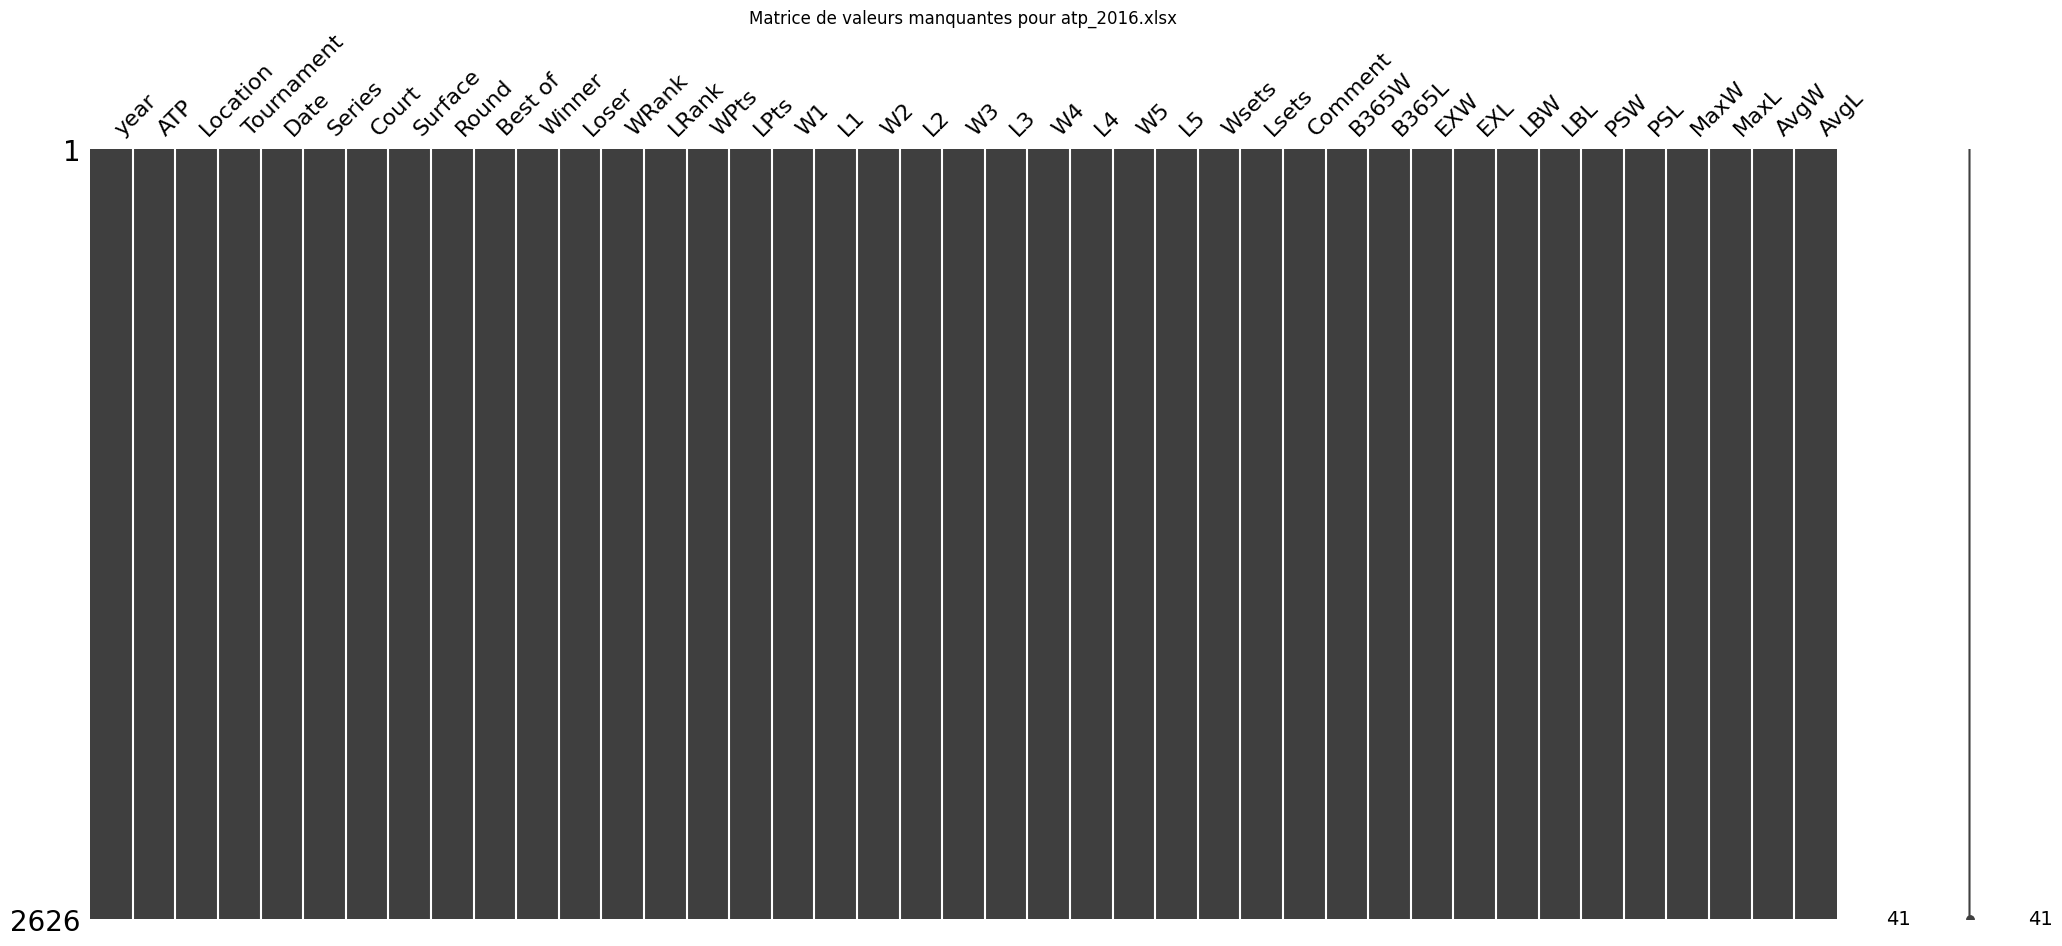

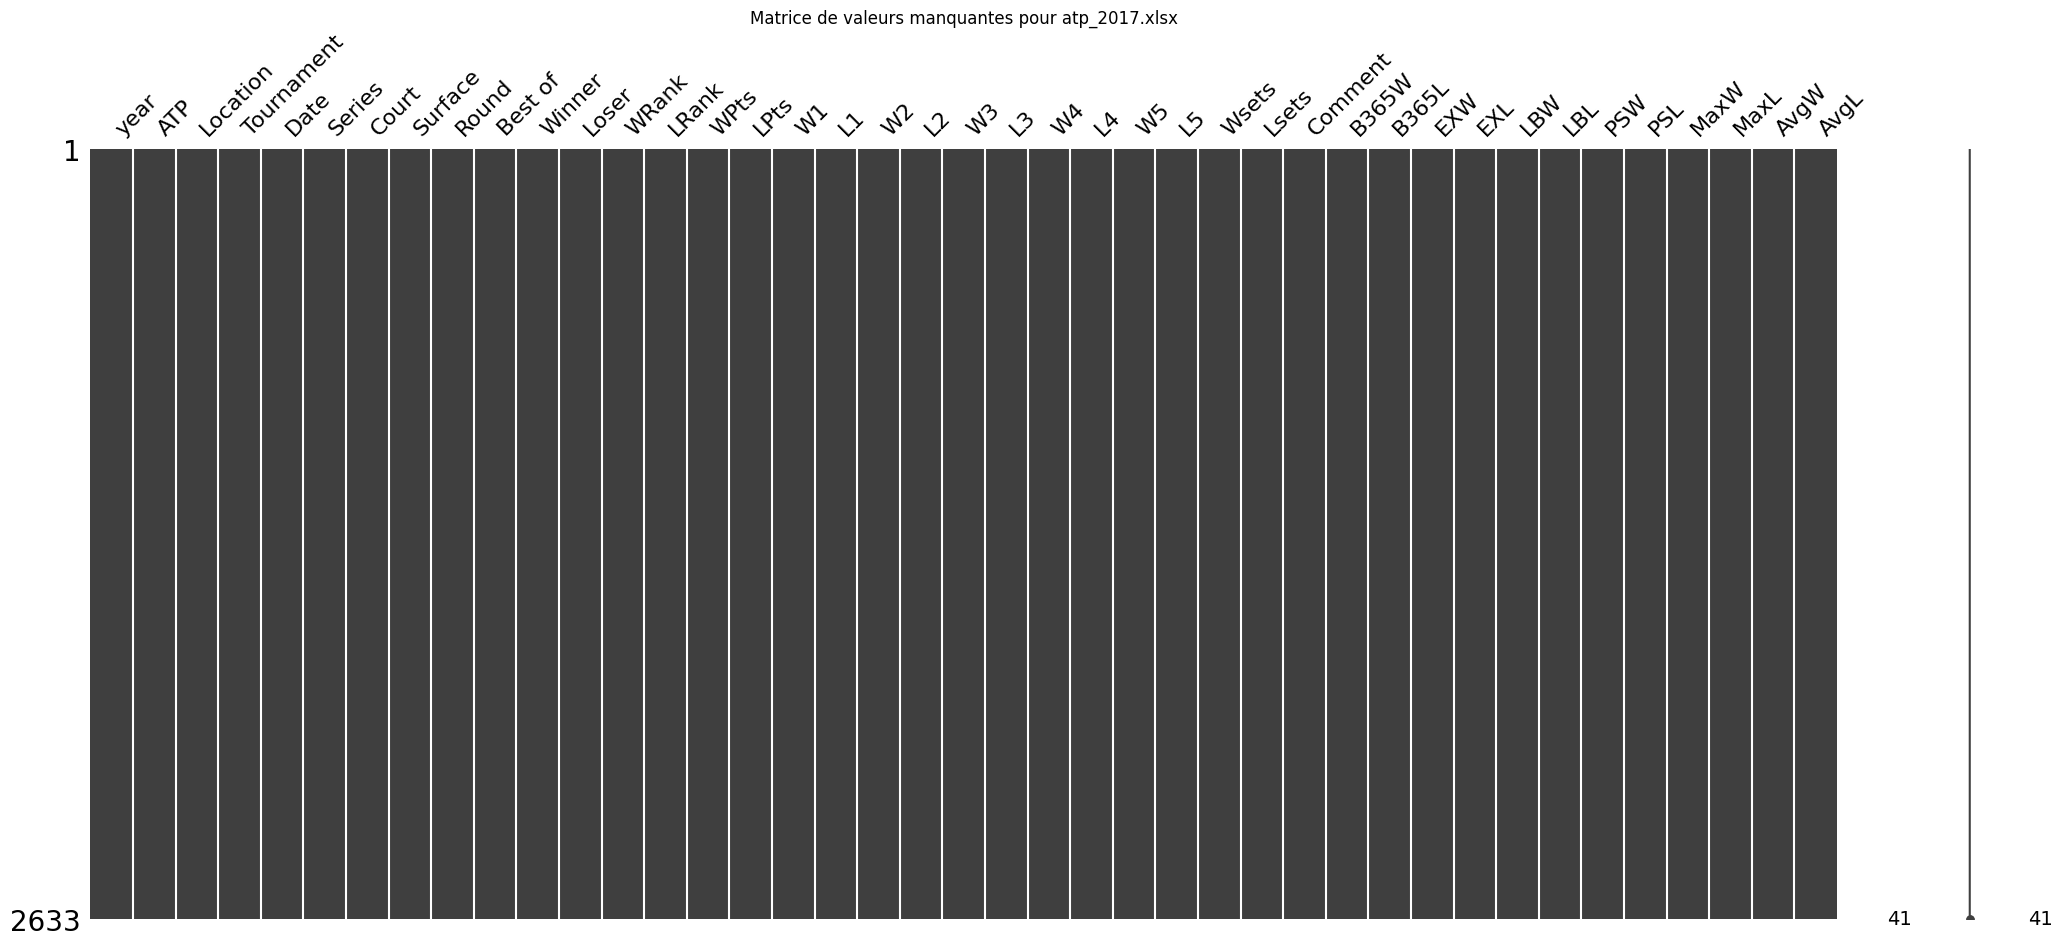

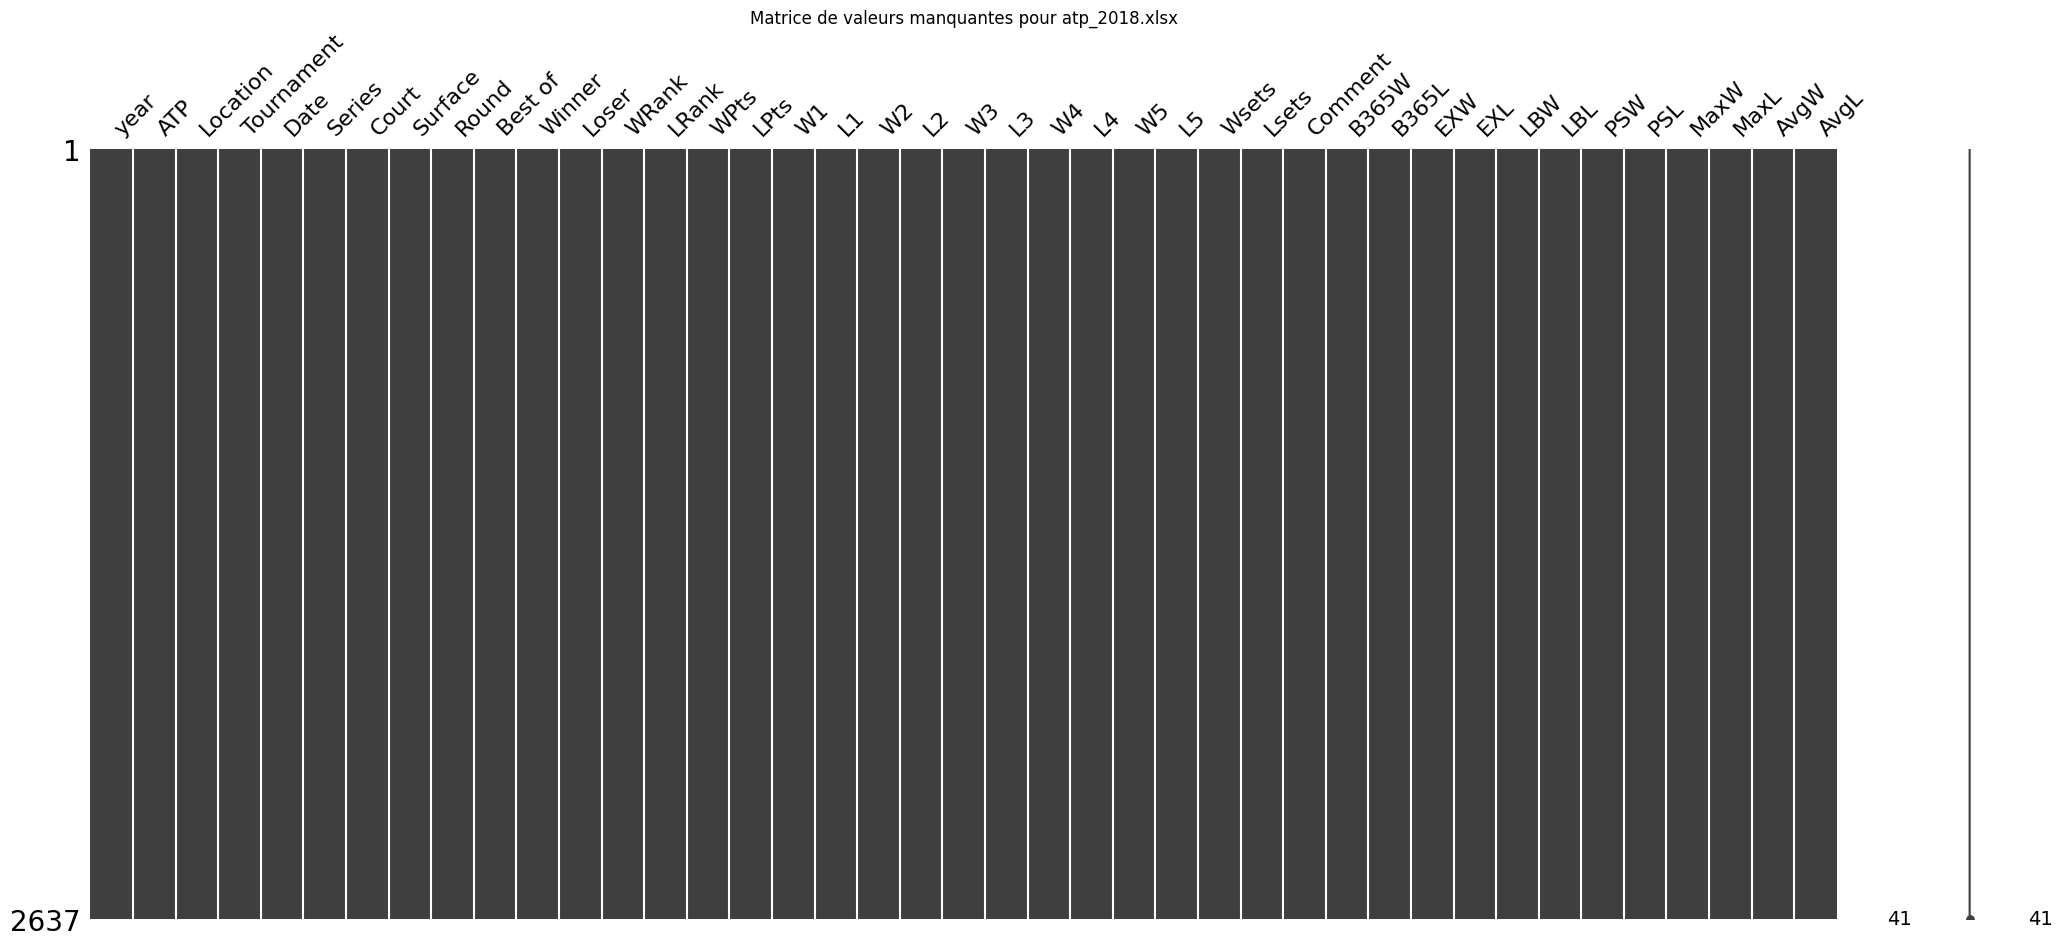

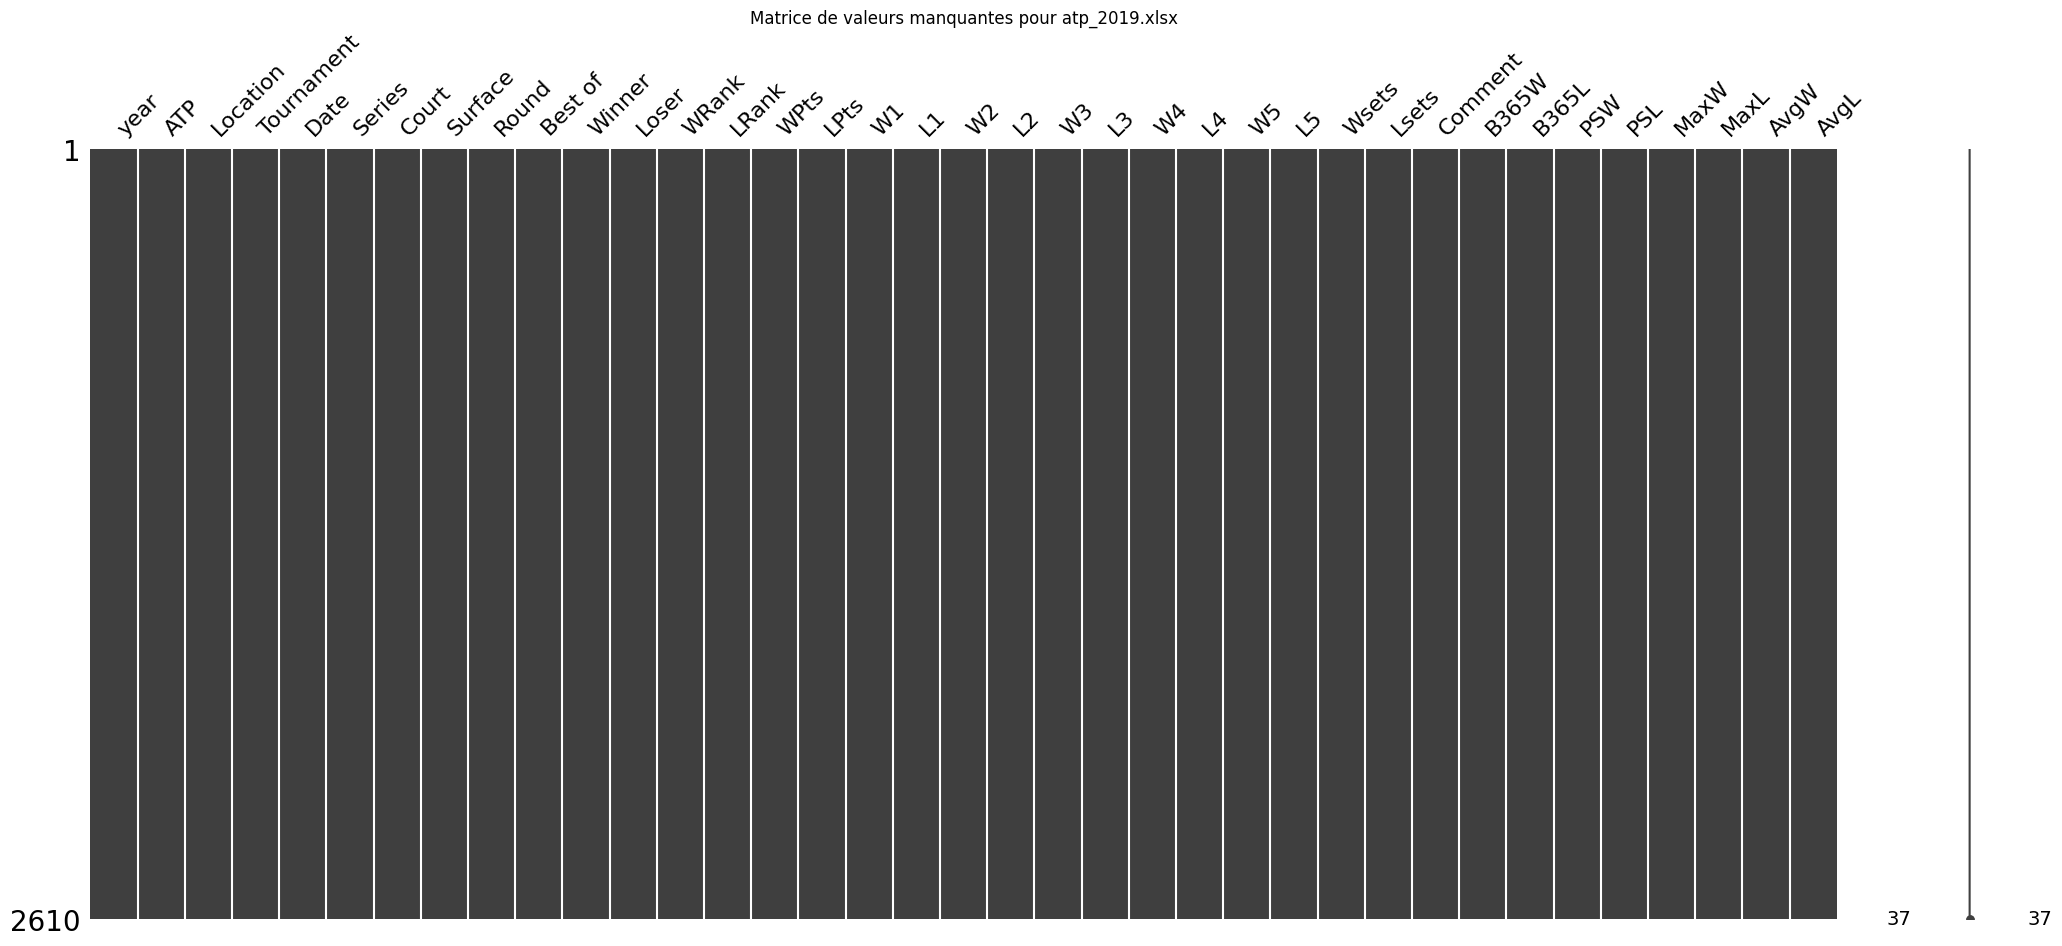

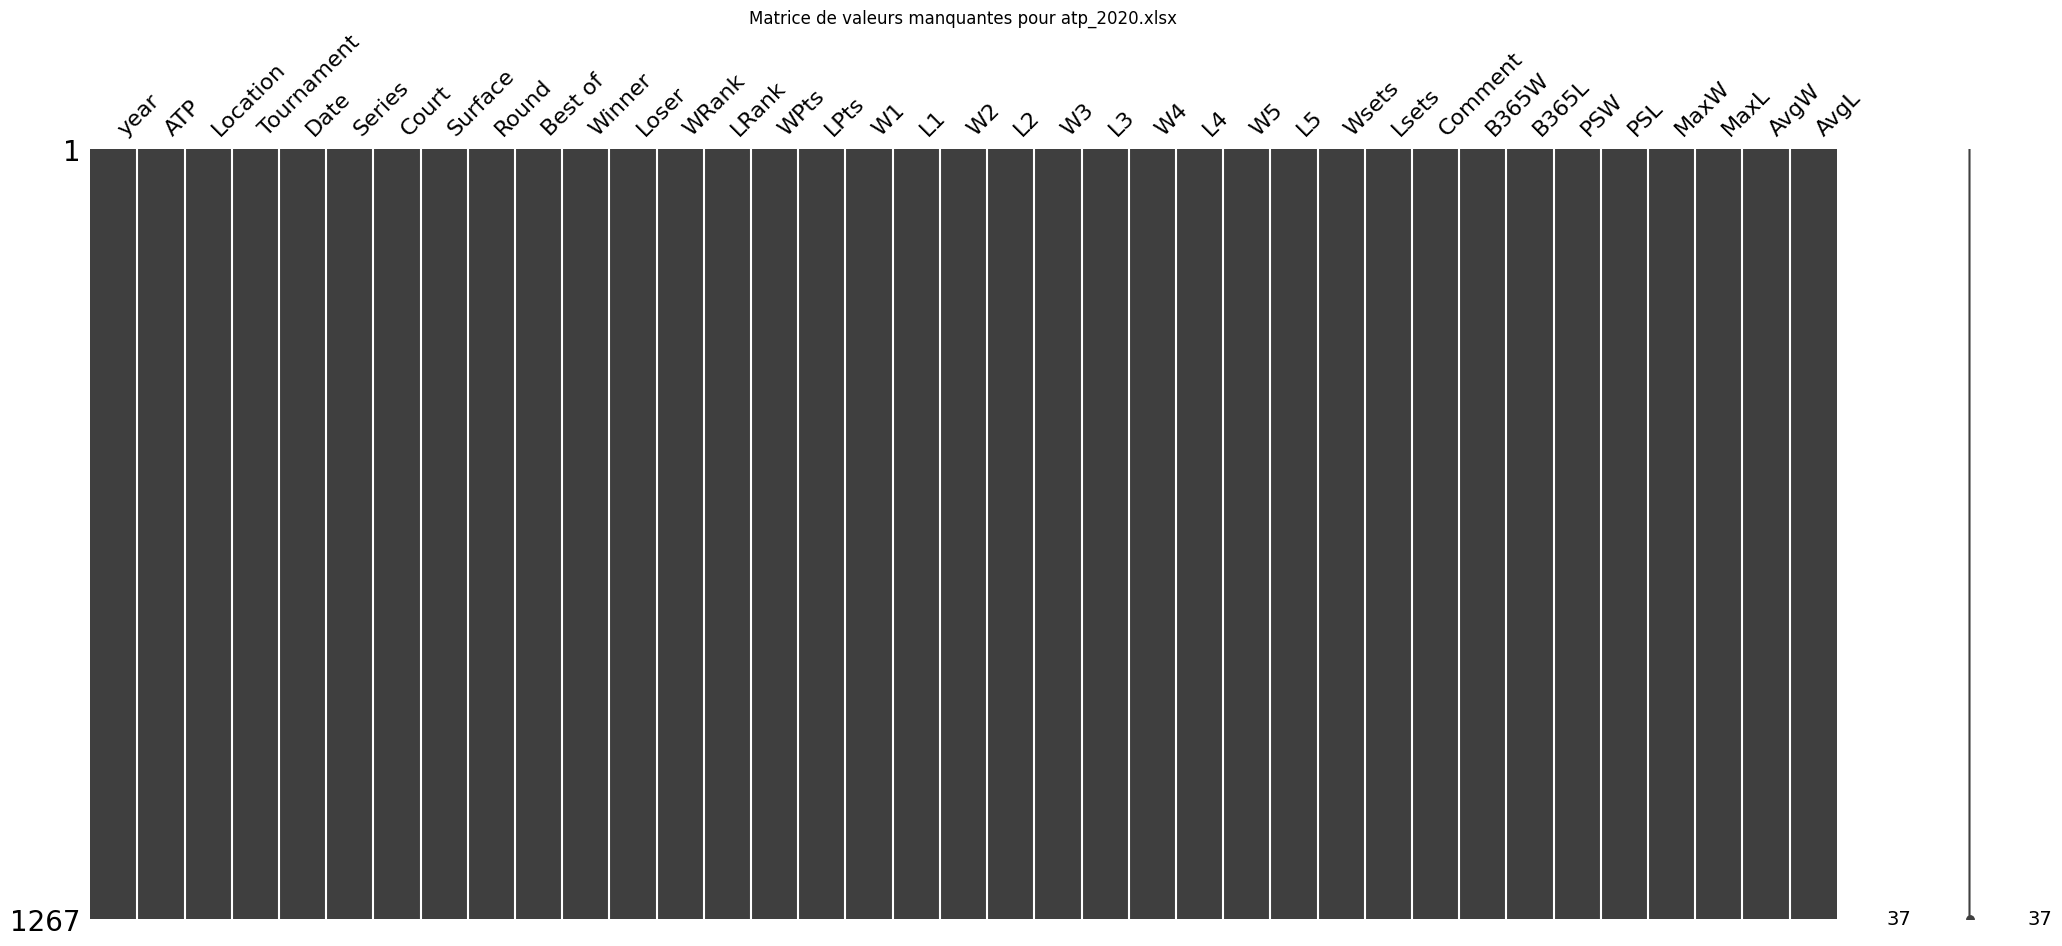

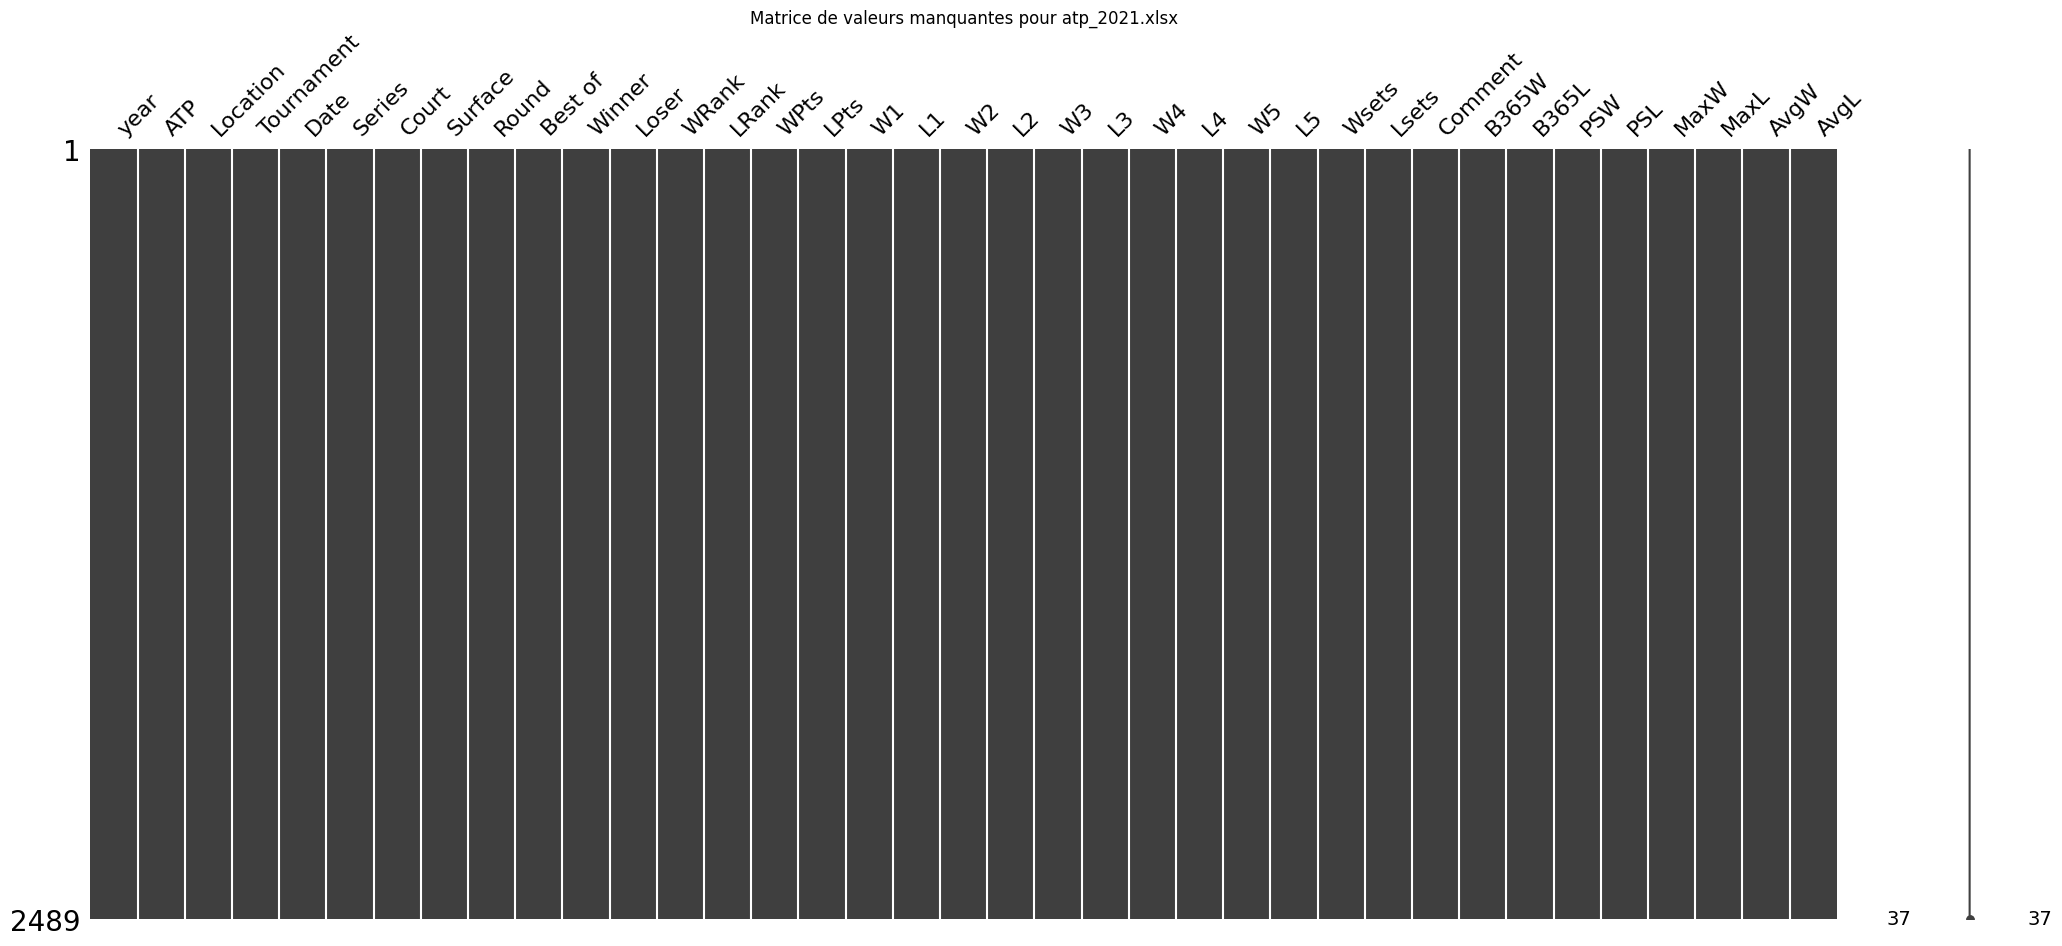

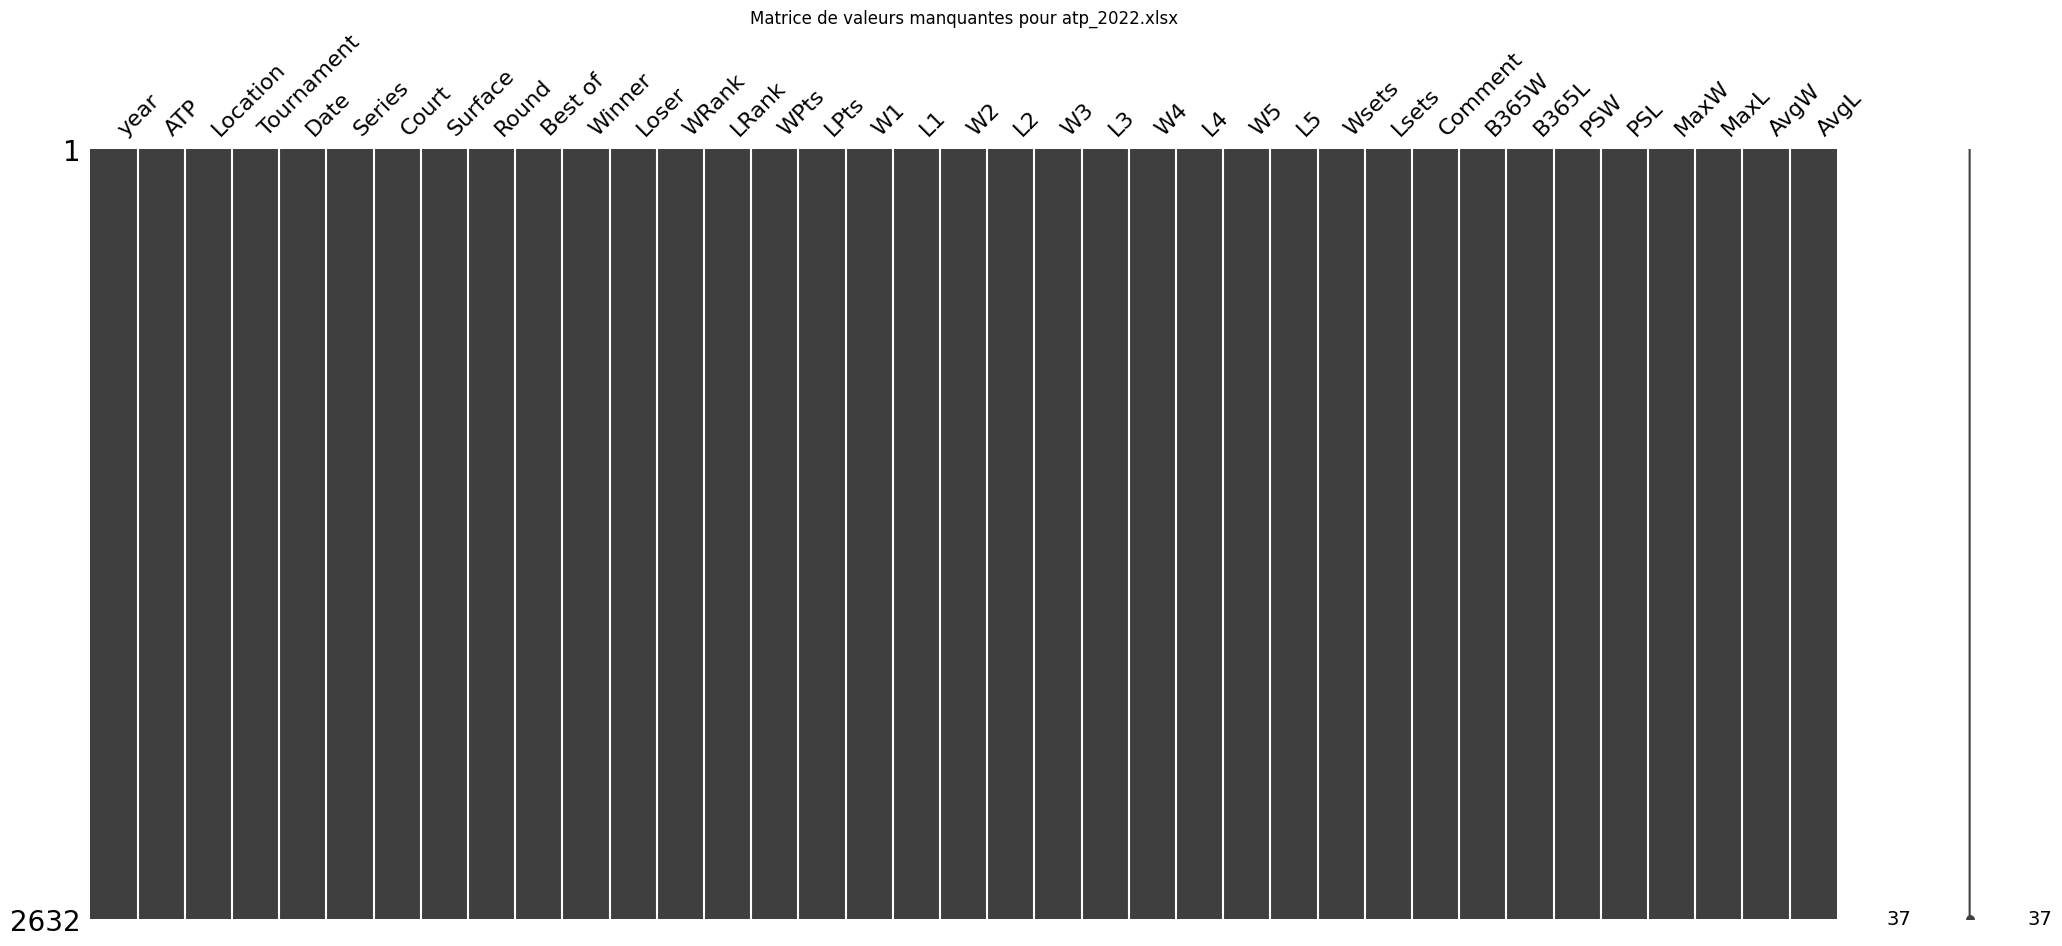

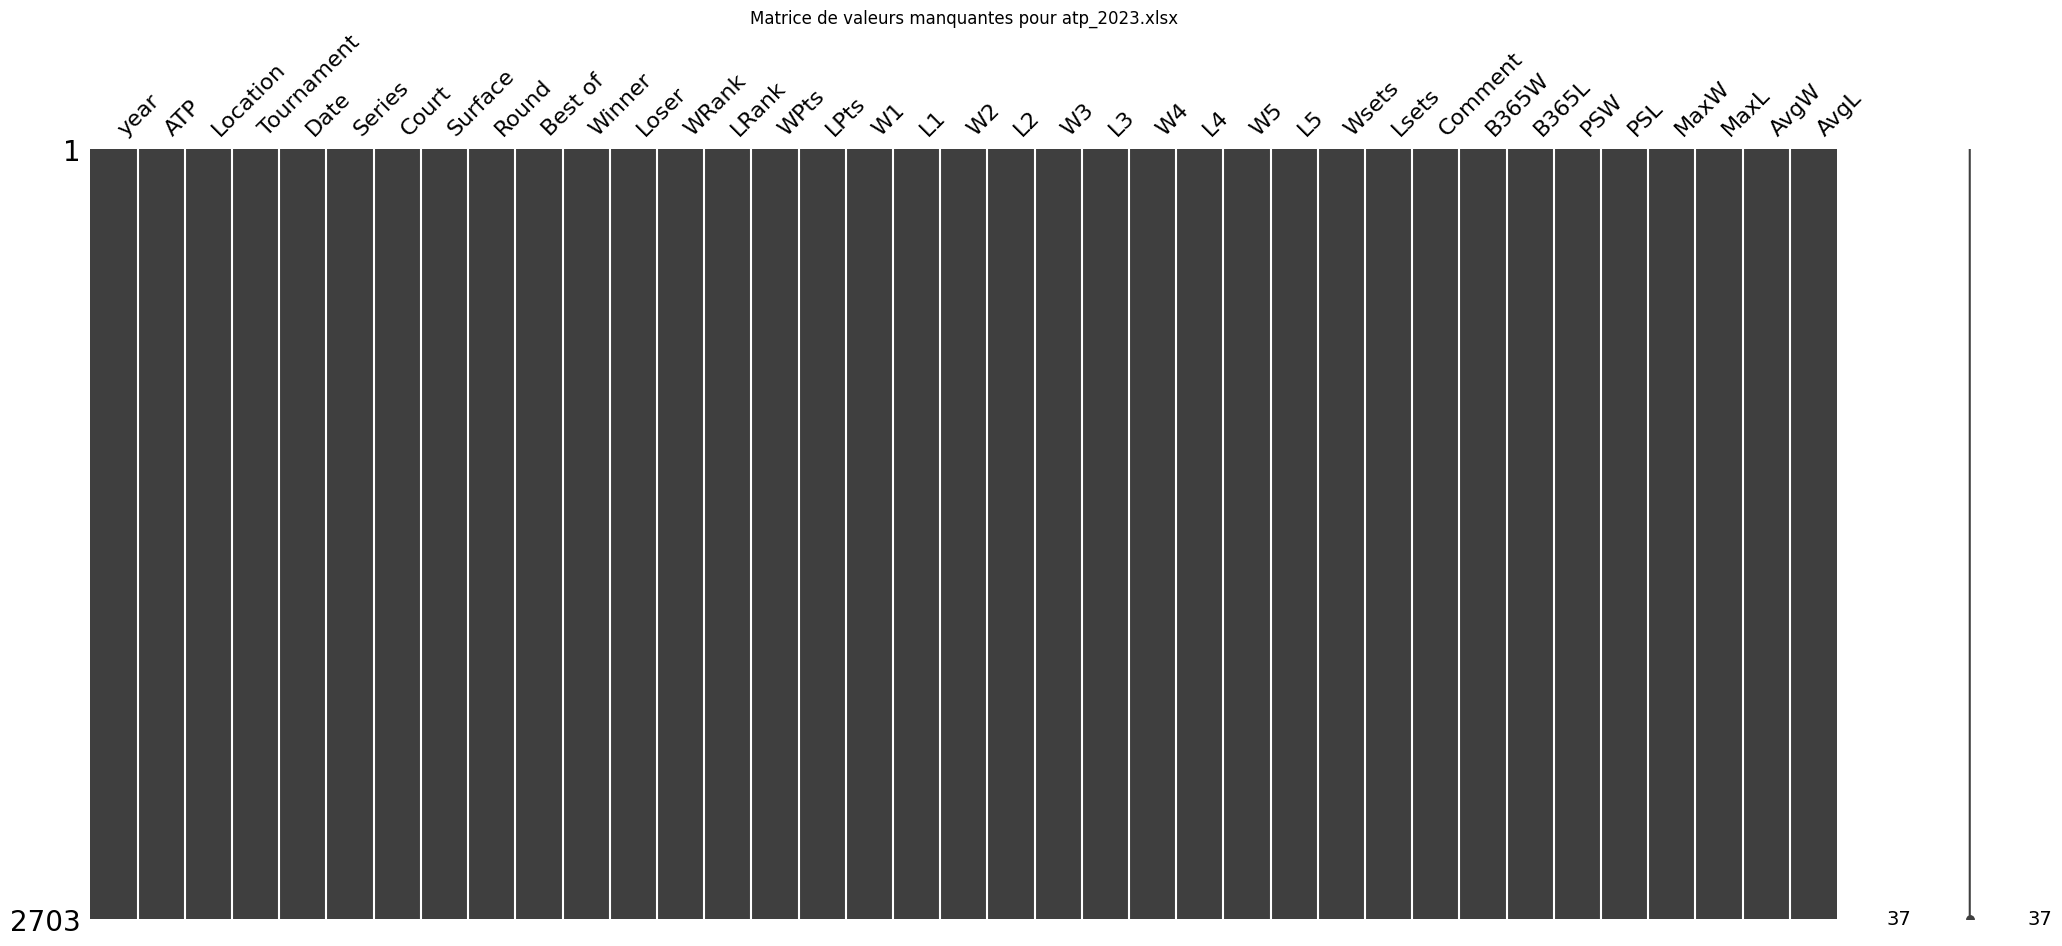

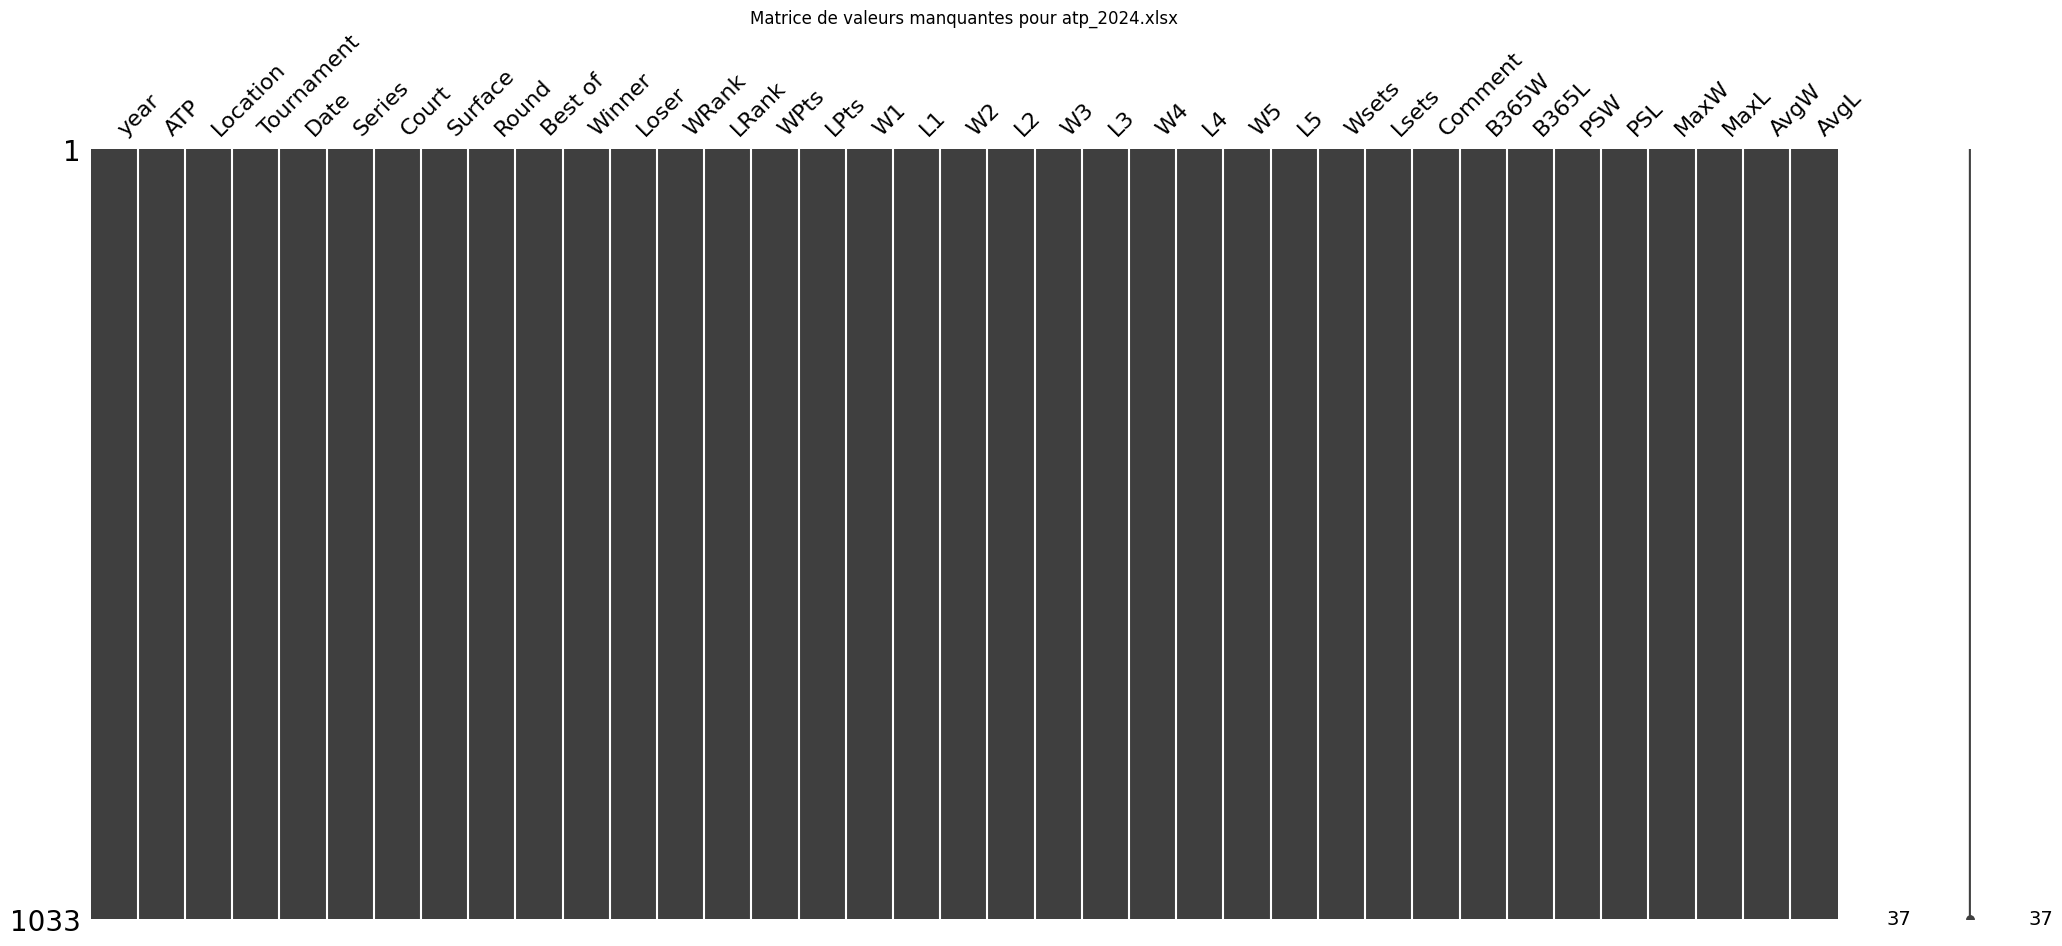

In [33]:
datasets_2013_2024 = ['atp_2013.xlsx', 'atp_2014.xlsx', 'atp_2015.xlsx', 'atp_2016.xlsx', 'atp_2017.xlsx',
                      'atp_2018.xlsx', 'atp_2019.xlsx', 'atp_2020.xlsx', 'atp_2021.xlsx', 'atp_2022.xlsx',
                      'atp_2023.xlsx', 'atp_2024.xlsx']

dfs_2013_2024 = []
for dataset in datasets_2013_2024:
    df = pd.read_excel(dataset)
    year = int(dataset.split('_')[1].split('.')[0]) 
    df['year'] = year
    cols = ['year'] + [col for col in df.columns if col != 'year']
    df = df[cols]
    df = df.dropna(axis=1, how='all')
    df.fillna(0, inplace=True)
    msno.matrix(df)
    plt.title(f"Matrice de valeurs manquantes pour {dataset}")
    plt.show()
    dfs_2013_2024.append(df)


In [34]:
df_block1 = pd.concat(dfs)
df_block2 = pd.concat(dfs_2013_2024)

In [35]:
df_block1.to_excel('atp_players_00_12.xlsx', index=False)
df_block2.to_excel('atp_players_13-24.xlsx', index=False)